In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Resultados:

Após passar por todo o processo de data science, percebi que os modelos que testei não estava lidando bem com as técnicas que usei para processar os dados.

Percebi que os encoders James Stein e Target se saíram piores que o One Hot Encoder. As Random Forests estavam overfitadas, pois no treino e validação os f1's estavam maiores que os resultados quando submetidos no kaggle.

As próximas etapas seriam: 
- pensar em novas features (feature engineering mais robusto)
- verificar se as features que manti sofreram um bom processamento
- verificar se estava utilizando adequadamente os modelos para a forma que os dados estavam ajeitados.



## Carregando os dados

In [ ]:
path = r"F:\Omni\Competição Kaggle 2.0\auditorias-em-planos-de-sade-ufg-fase-2\classificacao_binaria_train.csv"
pathest = r"F:\Omni\Competição Kaggle 2.0\auditorias-em-planos-de-sade-ufg-fase-2\classificacao_binaria_test.csv"

df = pd.read_csv(path, sep=";")
df_test = pd.read_csv(pathest, sep=";")

In [ ]:
path = r"/Users/alexecheverria/Kaggle/auditorias-em-planos-de-sade-ufg-fase-2/classificacao_binaria_train.csv"
pathest = r"/Users/alexecheverria/Kaggle/auditorias-em-planos-de-sade-ufg-fase-2/classificacao_binaria_test.csv"

df = pd.read_csv(path, sep=";")
df_test = pd.read_csv(pathest, sep=";")

## Overview do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413266 entries, 0 to 413265
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          413266 non-null  int64  
 1   NR_SEQ_ITEM                413266 non-null  int64  
 2   DT_REQUISICAO              413266 non-null  int64  
 3   DS_TIPO_GUIA               413266 non-null  object 
 4   DT_NASCIMENTO              413256 non-null  float64
 5   NR_PRODUTO                 413266 non-null  int64  
 6   DS_TIPO_PREST_SOLICITANTE  413266 non-null  object 
 7   DS_CBO                     413266 non-null  object 
 8   DS_TIPO_CONSULTA           15624 non-null   object 
 9   QT_TEMPO_DOENCA            303 non-null     float64
 10  DS_UNIDADE_TEMPO_DOENCA    304 non-null     object 
 11  DS_TIPO_DOENCA             970 non-null     object 
 12  DS_INDICACAO_ACIDENTE      381251 non-null  object 
 13  DS_TIPO_SAIDA              0 

### Primeiro vamos verificar nulos

In [ ]:
df.shape

(413266, 31)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                    10
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_TIPO_CONSULTA             397642
QT_TEMPO_DOENCA              412963
DS_UNIDADE_TEMPO_DOENCA      412962
DS_TIPO_DOENCA               412296
DS_INDICACAO_ACIDENTE         32015
DS_TIPO_SAIDA                413266
DS_TIPO_INTERNACAO           291222
DS_REGIME_INTERNACAO         291222
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291303
QT_DIA_SOLICITADO            292416
CD_GUIA_REFERENCIA           342740
DS_TIPO_ATENDIMENTO          121341
CD_CID                       235294
DS_INDICACAO_CLINICA          87535
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                 

#### Verificando os nulos de DT_NASCIMENTO

In [ ]:
df[df.DT_NASCIMENTO.isnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
83452,922781,2269867,2459261,Guia de solicitac?o SP/SADT,NaN,1,CLINICA DE IMAGEM,Medico ortopedista e traumatologista,NaN,NaN,...,NaN,PACIENTE COM LESAO CONDROMALACIA PATELAR NO JO...,Procedimentos,30713137,PUNCAO ARTICULAR DIAGNOSTICA OU TERAPEUTICA (I...,OUTROS PROCEDIMENTOS / PUNC?ES,SISTEMA MUSCULO-ESQUELETICO E ARTICULAC?ES,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
85197,922659,2269637,2459261,Guia de solicitac?o internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,NaN,tumor de pele em regi?o da face lateral de nar...,Procedimentos,30101077,"BIOPSIA DE PELE, TUMORES SUPERFICIAIS, TECIDO ...",PROCEDIMENTOS,PELE E TECIDO CELULAR SUBCUTANEO/ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
92213,902727,2208646,2459250,Guia de solicitac?o SP/SADT,NaN,1,CLINICA DE IMAGEM,Medico ortopedista e traumatologista,NaN,NaN,...,M23,NaN,Procedimentos,41101316,RM - RESSONANCIA MAGNETICA - ARTICULAR (POR AR...,RESSONANCIA MAGNETICA DIAGNOSTICA,RESSONANCIA MAGNETICA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
103329,939702,873384,2459269,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,NaN,NaN,...,M942,paciente com quadro de dor importante e de lon...,MAT/MED,144669,SYNVISC ONE SER.6ML - SER,Protese,Material Hospitalar,Simpro,1.0,Autorizado
130482,1018779,2568132,2459314,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,Primeira consulta,NaN,...,NaN,complemento de autorizac?o para taxa pertinent...,Procedimentos,60023384,TAXA DE SALA DE PROCEDIMENTO AMBULATORIAL,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
144245,938556,2316968,2459269,Guia de solicitac?o de prorrogac?o de internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,NaN,tumor de pele em regi?o da face lateral de nar...,Procedimentos,60026227,TAXA DE USO DE BISTURI ELETRONICO MICROPROCESS...,TAXA DE USO DE EQUIPAMENTO,TAXA DE USO DE EQUIPAMENTO,TAXAS,1.0,Negado
196795,922659,2269647,2459261,Guia de solicitac?o internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,NaN,tumor de pele em regi?o da face lateral de nar...,Procedimentos,60033711,TAXA DE OBSERVAC?O DE DE 6 A 12 HORAS,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
237152,922659,2269850,2459261,Guia de solicitac?o internac?o,NaN,1,HOSPITAL,Medico cirurgi?o de cabeca e pescoco,NaN,NaN,...,NaN,tumor de pele em regi?o da face lateral de nar...,Procedimentos,60023104,PORTE 1 (CIRURGIA PEQUENA),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
281314,939702,2319943,2459269,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,NaN,NaN,...,M942,paciente com quadro de dor importante e de lon...,Procedimentos,30713137,PUNCAO ARTICULAR DIAGNOSTICA OU TERAPEUTICA (I...,OUTROS PROCEDIMENTOS / PUNC?ES,SISTEMA MUSCULO-ESQUELETICO E ARTICULAC?ES,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
398941,1017273,2563293,2459313,Guia de solicitac?o SP/SADT,NaN,1,CLINICA,Medico ortopedista e traumatologista,Primeira consulta,NaN,...,NaN,complemento de autorizac?o para taxa pertinent...,Procedimentos,60023384,TAXA DE SALA DE PROCEDIMENTO AMBULATORIAL,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Negado


> Como são apenas 10 exemplos DT_NASCIMENTO nulos, vou optar por dropar, visto que quero substituir a data de nascimento pela idade do paciente.

In [ ]:
## dropando os nulls
df.dropna(subset=["DT_NASCIMENTO"], inplace=True)

In [ ]:
df.isnull().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_TIPO_CONSULTA             397634
QT_TEMPO_DOENCA              412953
DS_UNIDADE_TEMPO_DOENCA      412952
DS_TIPO_DOENCA               412286
DS_INDICACAO_ACIDENTE         32015
DS_TIPO_SAIDA                413256
DS_TIPO_INTERNACAO           291216
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                 

#### Verificando DS_TIPO_CONSULTA

In [ ]:
df[df.DS_TIPO_CONSULTA.notnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_CONSULTA,QT_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
11,692837,1578261,2459137,Guia de solicitac?o SP/SADT,2437132.0,1,CLINICA,Medico oftalmologista,Retorno / Seguimento,NaN,...,H400,"SUSPEITA DE GLAUCOMA, MIOPIA E ASTIGMATISMO IR...",Procedimentos,41501128,PAQUIMETRIA ULTRASSONICA - MONOCULAR,PROCEDIMENTOS DIAGNOSTICOS,OUTROS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
45,1342691,3654489,2459482,Guia de solicitac?o SP/SADT,2438260.0,1,CLINICA,Medico ortopedista e traumatologista,Primeira consulta,NaN,...,NaN,INFILTRAC?O DE PONTOS GATILHOS EM CINTURA ESCA...,Procedimentos,40901220,USG - ULTRASSONOGRAFIA - ARTICULAR (POR ARTICU...,ULTRA-SONOGRAFIA DIAGNOSTICA,ULTRA-SONOGRAFIA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Negado
66,1302232,3520043,2459461,Guia de solicitac?o SP/SADT,2445905.0,1,CLINICA,Medico oftalmologista,Retorno / Seguimento,NaN,...,H53,avaliac?o e tratamento de disturbios visuais.,Procedimentos,41501128,PAQUIMETRIA ULTRASSONICA - MONOCULAR,PROCEDIMENTOS DIAGNOSTICOS,OUTROS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Negado
89,1271547,3414434,2459446,Guia de solicitac?o SP/SADT,2434737.0,1,CLINICA,Medico oftalmologista,Retorno / Seguimento,NaN,...,H259,PRE OPERATORIO DE CATARATA,Procedimentos,41301080,CERATOSCOPIA COMPUTADORIZADA - MONOCULAR,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
124,1537573,4276450,2459587,Guia de solicitac?o SP/SADT,2432429.0,1,CLINICA,Medico oftalmologista,Retorno / Seguimento,NaN,...,H40,Avaliac?o e tratamento,Procedimentos,40103137,CAMPIMETRIA COMPUTADORIZADA - MONOCULAR,SISTEMA NERVOSO,ELETROFISIOLOGICOS / MECANICOS E FUNCIONAIS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413243,746944,1745643,2459166,Guia de solicitac?o SP/SADT,2454254.0,1,CLINICA,Medico oftalmologista,Retorno / Seguimento,NaN,...,H501,NaN,Procedimentos,41301200,EXAME DE MOTILIDADE OCULAR (TESTE ORTOPTICO) -...,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Negado
413256,1370877,3747355,2459497,Guia de solicitac?o SP/SADT,2435529.0,1,CLINICA,Medico oftalmologista,Primeira consulta,NaN,...,H335,OUTROS DESCOLAMENTOS DE RETINA,Procedimentos,41301315,RETINOGRAFIA DIGITAL MONOCULAR (RETINOGRAFIA S...,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
413259,1264164,3389559,2459443,Guia de solicitac?o SP/SADT,2437160.0,1,CLINICA,Medico oftalmologista,Retorno / Seguimento,NaN,...,H182,Avaliac?o e tratamento de edema de cornea + al...,Procedimentos,41301269,MICROSCOPIA ESPECULAR DE CORNEA - MONOCULAR,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
413261,921592,2265626,2459259,Guia de solicitac?o SP/SADT,2437804.0,1,MEDICO,Medico oftalmologista,Primeira consulta,NaN,...,H40,h40 glaucoma,Procedimentos,41301250,MAPEAMENTO DE RETINA (OFTALMOSCOPIA INDIRETA) ...,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Negado


In [ ]:
## Porcentagem de não nulos em relação a tudo
df.DS_TIPO_CONSULTA.notnull().sum() * 100 / df.shape[0]

3.7802233966354994

In [ ]:
## Podemos dropar a coluna, já que são apenas 3.78% não nulos e, infelizmente, essa informação não tem como estimar, dado tão poucos exemplos e especificidade.
df.drop(columns=["DS_TIPO_CONSULTA"], inplace=True)

In [ ]:
df.isnull().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
QT_TEMPO_DOENCA              412953
DS_UNIDADE_TEMPO_DOENCA      412952
DS_TIPO_DOENCA               412286
DS_INDICACAO_ACIDENTE         32015
DS_TIPO_SAIDA                413256
DS_TIPO_INTERNACAO           291216
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                    

#### QT_TEMPO_DOENCA

In [ ]:
df[df.QT_TEMPO_DOENCA.notnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,QT_TEMPO_DOENCA,DS_UNIDADE_TEMPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
154,713569,1643609,2459149,Guia de solicitac?o internac?o,2435679.0,1,MEDICO,Medico cirurgi?o geral,3.0,Meses,...,K439,PACIENTE COM INCISAO DE NEFRECTOMIA QUE APRESE...,Procedimentos,31009107,HERNIORRAFIA INCISIONAL,"ABDOME, PAREDE E CAVIDADE",SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
851,874965,2123165,2459237,Guia de solicitac?o internac?o,2444510.0,1,MEDICO,Medico cirurgi?o geral,8.0,Meses,...,K439,PACIENTE APRESENTA UMA HERNIA HIPOGASTRICA GRA...,Procedimentos,31009158,HERNIORRAFIA SEM RESSECC?O INTESTINAL ENCARCERADA,"ABDOME, PAREDE E CAVIDADE",SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Negado
2960,1060768,2709062,2459338,Guia de solicitac?o internac?o,2437100.0,1,HOSPITAL,Medico clinico,11.0,Dias,...,B342,COVID confirmado em 19/03/21. Inicio dos sinto...,Procedimentos,40302580,"UREIA, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,10.0,Autorizado
2975,696752,1590314,2459138,Guia de solicitac?o SP/SADT,2439286.0,1,MEDICO,Medico cirurgi?o geral,6.0,Meses,...,K808,"PACIENTE COM NEFRECTOMIA , COM 3 CIRURGIAS ABD...",Procedimentos,31005497,COLECISTECTOMIA SEM COLANGIOGRAFIA POR VIDEOLA...,FIGADO E VIAS BILIARES,SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
3548,614709,829222,2459091,Guia de solicitac?o internac?o,2439276.0,1,HOSPITAL,Medico em endoscopia,1.0,Dias,...,K359,PAciente com quadro de dor abdominal ha 36 hor...,MAT/MED,99952,TROCATER 10/11MM C/PTA.PROTEGIDA AMERICAN INST...,Protese,Material Hospitalar,Simpro,3.0,Autorizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404508,809462,1932441,2459198,Guia de solicitac?o SP/SADT,2435679.0,1,CLINICA,Medico oftalmologista,2.0,Anos,...,H40,Acompanhamento de GLAUCOMA,Procedimentos,41501128,PAQUIMETRIA ULTRASSONICA - MONOCULAR,PROCEDIMENTOS DIAGNOSTICOS,OUTROS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
405898,1052369,2679552,2459333,Guia de solicitac?o internac?o,2438347.0,1,HOSPITAL,Medico clinico,19.0,Dias,...,B342,COVID 19. PACIENTE COM EXAME DETECTAVEL EM 12/...,Procedimentos,40805018,RX - RADIOGRAFIA - TORAX - 1 INCIDENCIA,TORAX,METODOS DIAGNOSTICOS POR IMAGEM,PROCED. DIAGNOSTICOS E TERAPEUTICOS,3.0,Autorizado
406682,616698,1338540,2459093,Guia de solicitac?o SP/SADT,2444568.0,1,CLINICA,Medico oftalmologista,1.0,Anos,...,Z010,Para diagnostico diferencial de doencas cornea...,Procedimentos,41501128,PAQUIMETRIA ULTRASSONICA - MONOCULAR,PROCEDIMENTOS DIAGNOSTICOS,OUTROS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
410854,1225454,3255705,2459422,Guia de solicitac?o internac?o,2440665.0,1,HOSPITAL,Medico clinico,8.0,Dias,...,B342,"PACIENTE MASCULINO 51 ANOS , OBESO , ( PESO = ...",Procedimentos,60029089,DIARIA DE ISOLAMENTO (EM UTI),DIARIAS,DIARIAS,DIARIAS,1.0,Autorizado


> Como há apenas 303 exemplos não nulos para a coluna QT_TEMPO_DOENCA, podemos dropar essa coluna.

In [ ]:
df.drop(columns=["QT_TEMPO_DOENCA"], inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_UNIDADE_TEMPO_DOENCA      412952
DS_TIPO_DOENCA               412286
DS_INDICACAO_ACIDENTE         32015
DS_TIPO_SAIDA                413256
DS_TIPO_INTERNACAO           291216
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA               

#### DS_UNIDADE_TEMPO_DOENCA

In [ ]:
df[df.DS_UNIDADE_TEMPO_DOENCA.notnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_UNIDADE_TEMPO_DOENCA,DS_TIPO_DOENCA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
154,713569,1643609,2459149,Guia de solicitac?o internac?o,2435679.0,1,MEDICO,Medico cirurgi?o geral,Meses,Aguda,...,K439,PACIENTE COM INCISAO DE NEFRECTOMIA QUE APRESE...,Procedimentos,31009107,HERNIORRAFIA INCISIONAL,"ABDOME, PAREDE E CAVIDADE",SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
851,874965,2123165,2459237,Guia de solicitac?o internac?o,2444510.0,1,MEDICO,Medico cirurgi?o geral,Meses,Aguda,...,K439,PACIENTE APRESENTA UMA HERNIA HIPOGASTRICA GRA...,Procedimentos,31009158,HERNIORRAFIA SEM RESSECC?O INTESTINAL ENCARCERADA,"ABDOME, PAREDE E CAVIDADE",SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Negado
2960,1060768,2709062,2459338,Guia de solicitac?o internac?o,2437100.0,1,HOSPITAL,Medico clinico,Dias,Aguda,...,B342,COVID confirmado em 19/03/21. Inicio dos sinto...,Procedimentos,40302580,"UREIA, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,10.0,Autorizado
2975,696752,1590314,2459138,Guia de solicitac?o SP/SADT,2439286.0,1,MEDICO,Medico cirurgi?o geral,Meses,NaN,...,K808,"PACIENTE COM NEFRECTOMIA , COM 3 CIRURGIAS ABD...",Procedimentos,31005497,COLECISTECTOMIA SEM COLANGIOGRAFIA POR VIDEOLA...,FIGADO E VIAS BILIARES,SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
3548,614709,829222,2459091,Guia de solicitac?o internac?o,2439276.0,1,HOSPITAL,Medico em endoscopia,Dias,Aguda,...,K359,PAciente com quadro de dor abdominal ha 36 hor...,MAT/MED,99952,TROCATER 10/11MM C/PTA.PROTEGIDA AMERICAN INST...,Protese,Material Hospitalar,Simpro,3.0,Autorizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404508,809462,1932441,2459198,Guia de solicitac?o SP/SADT,2435679.0,1,CLINICA,Medico oftalmologista,Anos,NaN,...,H40,Acompanhamento de GLAUCOMA,Procedimentos,41501128,PAQUIMETRIA ULTRASSONICA - MONOCULAR,PROCEDIMENTOS DIAGNOSTICOS,OUTROS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
405898,1052369,2679552,2459333,Guia de solicitac?o internac?o,2438347.0,1,HOSPITAL,Medico clinico,Dias,Aguda,...,B342,COVID 19. PACIENTE COM EXAME DETECTAVEL EM 12/...,Procedimentos,40805018,RX - RADIOGRAFIA - TORAX - 1 INCIDENCIA,TORAX,METODOS DIAGNOSTICOS POR IMAGEM,PROCED. DIAGNOSTICOS E TERAPEUTICOS,3.0,Autorizado
406682,616698,1338540,2459093,Guia de solicitac?o SP/SADT,2444568.0,1,CLINICA,Medico oftalmologista,Anos,NaN,...,Z010,Para diagnostico diferencial de doencas cornea...,Procedimentos,41501128,PAQUIMETRIA ULTRASSONICA - MONOCULAR,PROCEDIMENTOS DIAGNOSTICOS,OUTROS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
410854,1225454,3255705,2459422,Guia de solicitac?o internac?o,2440665.0,1,HOSPITAL,Medico clinico,Dias,Aguda,...,B342,"PACIENTE MASCULINO 51 ANOS , OBESO , ( PESO = ...",Procedimentos,60029089,DIARIA DE ISOLAMENTO (EM UTI),DIARIAS,DIARIAS,DIARIAS,1.0,Autorizado


> Como há apenas 304 exemplos em que a coluna DS_UNIDADE_TEMPO_DOENCA não são nulos, podemos dropar essa coluna tbm.

In [ ]:
df.drop(columns=["DS_UNIDADE_TEMPO_DOENCA"], inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_TIPO_DOENCA               412286
DS_INDICACAO_ACIDENTE         32015
DS_TIPO_SAIDA                413256
DS_TIPO_INTERNACAO           291216
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM              

#### DS_TIPO_DOENCA

In [ ]:
df[df.DS_TIPO_DOENCA.notnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_TIPO_DOENCA,DS_INDICACAO_ACIDENTE,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
43,1406396,3861670,2459515,Guia de solicitac?o de prorrogac?o de internac?o,2439209.0,1,HOSPITAL,Medico clinico,Aguda,N?o acidente,...,R500,"PACIENTE 55 ANOS, COM PO DE DRENAGEM DE HEMATO...",Procedimentos,20103344,MIOPATIAS,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,12.0,Autorizado
80,1185466,3125028,2459401,Guia de solicitac?o internac?o,2434131.0,1,HOSPITAL,Medico clinico,Aguda,N?o acidente,...,N18,paciente idosa com anos aneurica apresentand...,Procedimentos,10104020,ATENDIMENTO MEDICO DO INTENSIVISTA EM UTI GERA...,UTI,CONSULTAS,PROCED. GERAIS,2.0,Negado
154,713569,1643609,2459149,Guia de solicitac?o internac?o,2435679.0,1,MEDICO,Medico cirurgi?o geral,Aguda,Outros,...,K439,PACIENTE COM INCISAO DE NEFRECTOMIA QUE APRESE...,Procedimentos,31009107,HERNIORRAFIA INCISIONAL,"ABDOME, PAREDE E CAVIDADE",SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
851,874965,2123165,2459237,Guia de solicitac?o internac?o,2444510.0,1,MEDICO,Medico cirurgi?o geral,Aguda,N?o acidente,...,K439,PACIENTE APRESENTA UMA HERNIA HIPOGASTRICA GRA...,Procedimentos,31009158,HERNIORRAFIA SEM RESSECC?O INTESTINAL ENCARCERADA,"ABDOME, PAREDE E CAVIDADE",SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Negado
1891,1270928,3412699,2459446,Guia de solicitac?o de prorrogac?o de internac?o,2431313.0,1,HOSPITAL,Medico clinico,Aguda,N?o acidente,...,I25,"PACIENTE 77 ANOS, COM QUADRO DE DESCONFORTO RE...",Procedimentos,60023112,PORTE 2 (CIRURGIA MEDIA),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Negado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411275,1268805,921023,2459445,Guia de solicitac?o de prorrogac?o de internac?o,2426520.0,1,HOSPITAL,Medico neurologista,Aguda,N?o acidente,...,G45,"paciente 90 anos, idosa com AVEI maligno GRAVE...",MAT/MED,20114,SONDA NASOENTERAL 12FR FLEXIFLO - UN,Material de consumo,Material Hospitalar,Simpro,1.0,Autorizado
411629,1052369,887286,2459333,Guia de solicitac?o internac?o,2438347.0,1,HOSPITAL,Medico clinico,Aguda,N?o acidente,...,B342,COVID 19. PACIENTE COM EXAME DETECTAVEL EM 12/...,MAT/MED,290014,EQUIPO BOMBA INFUSAO - UN,Material de consumo,Material Hospitalar,Simpro,21.0,Autorizado
411850,1388025,3803114,2459507,Guia de solicitac?o de prorrogac?o de internac?o,2439209.0,1,HOSPITAL,Medico clinico,Aguda,N?o acidente,...,R500,Descric?o em anexo,Procedimentos,31101020,ABSCESSO RENAL OU PERI-RENAL - DRENAGEM PERCUT...,"RIM, BACINETE E SUPRA-RENAL",SISTEMA URINARIO,PROCED. CIRURGICOS E INVASIVOS,1.0,Negado
412172,1061417,2710971,2459339,Guia de solicitac?o internac?o,2437268.0,1,HOSPITAL,Medico clinico,Aguda,N?o acidente,...,I64,em anexo,Procedimentos,60000783,ENFERMARIA,DIARIAS,DIARIAS,DIARIAS,1.0,Autorizado


> Como só há 970 exemplos que não são nulos, podemos dropar essa coluna também.

In [ ]:
df.drop(columns=["DS_TIPO_DOENCA"], inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE         32015
DS_TIPO_SAIDA                413256
DS_TIPO_INTERNACAO           291216
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### DS_INDICACAO_ACIDENTE

In [ ]:
## verificando os valores únicos
df[df.DS_INDICACAO_ACIDENTE.notnull()].DS_INDICACAO_ACIDENTE.unique()

array(['N?o acidente', 'Outros', 'Trabalho', 'Transito'], dtype=object)

In [ ]:
## verificando os não nulos
df[df.DS_INDICACAO_ACIDENTE.notnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1560479,4348670,2459598,Guia de solicitac?o SP/SADT,2440511.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,NaN,...,NaN,NaN,Procedimentos,60023104,PORTE 1 (CIRURGIA PEQUENA),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Negado
2,615210,1333736,2459091,Guia de solicitac?o internac?o,2443536.0,1,HOSPITAL,Medico clinico,N?o acidente,NaN,...,B342,Paciente positivo para COVID 19 ha 10 dias com...,Procedimentos,10102019,VISITA HOSPITALAR A PACIENTE INTERNADO,VISITAS,CONSULTAS,PROCED. GERAIS,1.0,Autorizado
3,1340515,3648137,2459482,Guia de solicitac?o SP/SADT,2429575.0,1,CLINICA,Medico cardiologista,N?o acidente,NaN,...,I10,NaN,Procedimentos,40302318,"POTASSIO, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
4,1135757,897098,2459375,Guia de solicitac?o SP/SADT,2439815.0,1,CLINICA,Medico ortopedista e traumatologista,N?o acidente,NaN,...,M16,DOR CRONICA NO QUADRIL E COLUNA LOMBAR,MAT/MED,37765,NAUSEDRON 2 MG/ML SOL INJ CX 50 AMP VD INC X 2...,ANTIEMETICOS E ANTINAUSEANTES,"SISTEMA DIGESTIVO, METABOLISMO E NUTRICAO+SIST...",Brasindice,1.0,Autorizado
5,1351610,937069,2459487,Guia de solicitac?o SP/SADT,2441089.0,1,HOSPITAL,Medico clinico,N?o acidente,NaN,...,C50,C50,MAT/MED,73512,ZEDORA 440 MG PO LIOF SOL INJ IV CT FA VD TRAN...,ANTINEOPLASICOS,AGENTES ANTINEOPLASICOS,Brasindice,880.0,Autorizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413261,921592,2265626,2459259,Guia de solicitac?o SP/SADT,2437804.0,1,MEDICO,Medico oftalmologista,N?o acidente,NaN,...,H40,h40 glaucoma,Procedimentos,41301250,MAPEAMENTO DE RETINA (OFTALMOSCOPIA INDIRETA) ...,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Negado
413262,608870,1313415,2459089,Guia de solicitac?o SP/SADT,2440041.0,1,CLINICA,Medico oftalmologista,N?o acidente,NaN,...,NaN,NaN,Procedimentos,41301439,FUNDOSCOPIA SOB MEDRIASES - BINOCULAR,PROCEDIMENTOS,TESTES PARA DIAGNOSTICO,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
413263,1489829,4129003,2459557,Guia de solicitac?o de prorrogac?o de internac?o,2438718.0,1,HOSPITAL,Medico cirurgi?o geral,N?o acidente,NaN,...,NaN,paciente com metastase de sarcona \nData da en...,Procedimentos,60033711,TAXA DE OBSERVAC?O DE DE 6 A 12 HORAS,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
413264,690055,1570248,2459136,Guia de solicitac?o SP/SADT,2440704.0,1,CLINICA,Medico clinico,N?o acidente,NaN,...,H40,GLAUCOMA,Procedimentos,41501144,PCT-COMP - TOMOGRAFIA DE COERENCIA OPTICA - MO...,TOMOGRAFIA COMPUTADORIZADA DIAGNOSTICA,TOMOGRAFIA COMPUTADORIZADA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado


In [ ]:
## Entendendo a moda e sua frequência.
df.DS_INDICACAO_ACIDENTE.describe()

count           381241
unique               4
top       N?o acidente
freq            319728
Name: DS_INDICACAO_ACIDENTE, dtype: object

In [ ]:
df.DS_INDICACAO_ACIDENTE.value_counts()

N?o acidente    319728
Outros           60579
Trabalho           745
Transito           189
Name: DS_INDICACAO_ACIDENTE, dtype: int64

In [ ]:
## quantos nulos temos mesmo?
df.DS_INDICACAO_ACIDENTE.isna().sum()

32015

> Como são poucos exemplos nulos e como a classe mais frequente domina as outras classes possíveis com uma grande diferença, creio que subsituir os nulos pelo valor mais frequente é o ideal.

In [ ]:
df.DS_INDICACAO_ACIDENTE.fillna("N?o acidente", inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_SAIDA                413256
DS_TIPO_INTERNACAO           291216
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### DS_TIPO_SAIDA

In [ ]:
df[df.DS_TIPO_SAIDA.notnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_SAIDA,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM


In [ ]:
df.DS_TIPO_SAIDA.isna().sum(), df.shape[0]

(413256, 413256)

> Todos os valores da coluna são nulos, podemos dropar, tranquilamente.

In [ ]:
df.drop(columns=["DS_TIPO_SAIDA"], inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_INTERNACAO           291216
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### DS_TIPO_INTERNACAO

In [ ]:
print("Porcentagem de nulos em TIPO_INTERNACAO:", df.DS_TIPO_INTERNACAO.isna().sum() / df.shape[0])

Porcentagem de nulos em TIPO_INTERNACAO: 0.7046866833149428


In [ ]:
df.DS_TIPO_INTERNACAO.value_counts()

Clinica         58232
Cirurgica       58066
Pediatrica       2579
Obstetrica       1736
Hemodinamica     1378
Psiquiatrica       49
Name: DS_TIPO_INTERNACAO, dtype: int64

> Será que alguma feature indica se a requisição foi internação ou não? Se não houver, podemos criar uma classe aqui que diga que os nulos não foram internação. É uma hipótese, vou verificar as outras features para ver se não há contradições.

In [ ]:
## verificando se a feature regime_internacao nos dá alguma dica sobre a internação ou não.
df.DS_REGIME_INTERNACAO.value_counts()

Hospitalar      115509
Hospital-dia      5932
Domiciliar         599
Name: DS_REGIME_INTERNACAO, dtype: int64

In [ ]:
## será que o carater de atendimento nos revela algo?
df.DS_CARATER_ATENDIMENTO.value_counts()

Eletiva                287442
Urgencia/Emergencia    125814
Name: DS_CARATER_ATENDIMENTO, dtype: int64

> Opa, será que a maioria das urgencia/emergencia são internações?

In [ ]:
## vamos averiguar, para todos os casos de emergencia, se o tipo de internação está presente na maioria dos casos:
df[df.DS_CARATER_ATENDIMENTO == "Urgencia/Emergencia"].DS_TIPO_INTERNACAO.isna().sum()

34718

In [ ]:
df[df.DS_CARATER_ATENDIMENTO == "Urgencia/Emergencia"].DS_TIPO_INTERNACAO.isna().sum() * 100/ df[df.DS_CARATER_ATENDIMENTO == "Urgencia/Emergencia"].shape[0]

27.594703292161444

> Cerca de 27.6% das emergências não possuem o tipo de internação.

E para os casos eletivos? Será que há internações?

In [ ]:
df[df.DS_CARATER_ATENDIMENTO == "Eletiva"].DS_TIPO_INTERNACAO.isna().sum() * 100 /df[df.DS_CARATER_ATENDIMENTO == "Eletiva"].shape[0]

89.23469778250917

> Vish, 89% dos casos eletivos não possuem o tipo de internação. Vamos explorar os casos que possuem o tipo discriminado.

In [ ]:
eletivas = df[df.DS_CARATER_ATENDIMENTO == "Eletiva"]
eletivas[eletivas.DS_TIPO_INTERNACAO.notnull()].sample(10)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
270524,725554,1680845,2459153,Guia de solicitac?o internac?o,2438896.0,1,HOSPITAL,Medico ortopedista e traumatologista,Outros,Cirurgica,...,M652,PACIENTE COM DOR NO OMBRO CRONICA DEVIDO A TEN...,Procedimentos,60000783,ENFERMARIA,DIARIAS,DIARIAS,DIARIAS,1.0,Autorizado
80458,808643,1930418,2459198,Guia de solicitac?o internac?o,2441458.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,Cirurgica,...,M511,Paciente com indicac?o de tratamento cirurgico...,Procedimentos,60000783,ENFERMARIA,DIARIAS,DIARIAS,DIARIAS,1.0,Negado
343965,657193,1467285,2459115,Guia de solicitac?o internac?o,2430735.0,1,CLINICA,Medico cirurgi?o do aparelho digestivo,N?o acidente,Cirurgica,...,K92,TROCA DE SONDA ENDONASAL,Procedimentos,31602231,ANESTESIA PARA ENDOSCOPIA DIGESTIVA ALTA E BAIXA,BLOQUEIOS ANESTESICOS DE NERVOS E ESTIMULOS NE...,OUTROS PROCEDIMENTOS INVASIVOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
169202,659083,834989,2459116,Guia de solicitac?o internac?o,2453171.0,1,HOSPITAL,Medico clinico,N?o acidente,Cirurgica,...,K122,"PACIENTE COM LIMITC?O DE ABERTURA BUCAL FORTE,...",MAT/MED,277310,NEXSTAT TOPICA HEMOSTATICO PO 1GR - UN,Material de consumo,Material Hospitalar,Simpro,2.0,Negado
129860,696304,1589316,2459138,Guia de solicitac?o internac?o,2435276.0,1,HOSPITAL,Medico clinico,N?o acidente,Cirurgica,...,N41,"paciente com hipoplasia bexiga da prostata, q...",Procedimentos,31201130,RESSECC?O ENDOSCOPICA DA PROSTATA,PROSTATA E VESICULAS SEMINAIS,SISTEMA GENITAL E REPRODUTOR MASCULINO,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
16562,783748,1855391,2459185,Guia de solicitac?o de prorrogac?o de internac?o,2442452.0,1,HOSPITAL,Medico cirurgi?o cardiovascular,Outros,Cirurgica,...,I35,POS OPERATORIO DE TROCA VALVAR AORTICA BIOLOGICA,Procedimentos,40302024,GASOMETRIA + HB + HT + NA + K + CL + CA + GLI...,BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,5.0,Negado
40759,1344167,3659965,2459485,Guia de solicitac?o de prorrogac?o de internac?o,2441915.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,Cirurgica,...,NaN,Solicito autorizac?o dos itens faltantes\n*por...,Procedimentos,60023155,PORTE 6 (CIRURGIA GRANDE),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
374156,699596,1599221,2459139,Guia de solicitac?o internac?o,2456493.0,1,HOSPITAL,Medico otorrinolaringologista,N?o acidente,Cirurgica,...,J350,PACIENTE COM AMIGDALITE CRONICA INFECC?ES COM ...,Procedimentos,30205042,ADENOIDECTOMIA,FARINGE,CABECA E PESCOCO,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
291803,890832,2172673,2459245,Guia de solicitac?o internac?o,2431992.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,Cirurgica,...,M519,PACIENTE 74 ANOS COM QUADRO DE LOMBAR DE FORTE...,Procedimentos,31602169,BLOQUEIO PERIDURAL OU SUBARACNOIDEO COM CORTIC...,BLOQUEIOS ANESTESICOS DE NERVOS E ESTIMULOS NE...,OUTROS PROCEDIMENTOS INVASIVOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
302715,1260304,3376217,2459440,Guia de solicitac?o internac?o,2446409.0,1,HOSPITAL,Medico cirurgi?o geral,N?o acidente,Cirurgica,...,NaN,Paciente tem dor no HD. Tem crise de colecisti...,Procedimentos,60024380,TAXA DE USO DO APARELHO PARA VIDEOLAPAROSCOPIA...,TAXA DE USO DE EQUIPAMENTO,TAXA DE USO DE EQUIPAMENTO,TAXAS,1.0,Negado


> Mas parece que as DS_TIPO_GUIA indicam se são internação ou não... Para ser, temos que averiguar se onde sabemos que é internação a DS_TIPO_GUIA afirma que é.

In [ ]:
df.DS_TIPO_GUIA.unique()

array(['Guia de solicitac?o SP/SADT', 'Guia de solicitac?o internac?o',
       'Guia de solicitac?o de prorrogac?o de internac?o'], dtype=object)

> ótimo, são apenas 3 valores únicos, facilita bastante o trabalho. Vamos ver quantos são internação.

In [ ]:
df.DS_TIPO_GUIA.value_counts()

Guia de solicitac?o SP/SADT                         291196
Guia de solicitac?o internac?o                       62230
Guia de solicitac?o de prorrogac?o de internac?o     59830
Name: DS_TIPO_GUIA, dtype: int64

> Ok, apenas 122.060 itens são solicitações de internação ou prorrogação de internação.

In [ ]:
## Vamos verificar para onde tem o tipo de internação presente se o TIPO_GUIA fala de internação.
internacao = df[df.DS_TIPO_INTERNACAO.notnull()]

internacao.DS_TIPO_GUIA.value_counts()

Guia de solicitac?o internac?o                      62230
Guia de solicitac?o de prorrogac?o de internac?o    59810
Name: DS_TIPO_GUIA, dtype: int64

> Ótimo! Todos os exemplos onde o tipo de internação está presente há somente solicitação de internação ou prorrogação. Estamos a um passo de afirmar que onde não há especificado o tipo de internação e o tipo guia não consta internação podemos afirmar que não é internação.

In [ ]:
## apenas averiguando se há valores nulos do DS_TIPO_GUIA para TIPO_INTERNACAO presente
internacao.DS_TIPO_GUIA.isna().sum()

0

> Não há nulos!! Vamos averiguar a recíproca, ou seja, se sempre quando o DS_TIPO_GUIA é sobre internação, se o TIPO_INTERNAÇÃO está presente.

In [ ]:
internacao = df.query("DS_TIPO_GUIA == 'Guia de solicitac?o internac?o' or DS_TIPO_GUIA == 'Guia de solicitac?o de prorrogac?o de internac?o'")
internacao.DS_TIPO_INTERNACAO.value_counts()

Clinica         58232
Cirurgica       58066
Pediatrica       2579
Obstetrica       1736
Hemodinamica     1378
Psiquiatrica       49
Name: DS_TIPO_INTERNACAO, dtype: int64

In [ ]:
internacao.DS_TIPO_INTERNACAO.isna().sum()

20

In [ ]:
internacao[internacao.DS_TIPO_INTERNACAO.isna()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
15027,1135888,2957655,2459375,Guia de solicitac?o de prorrogac?o de internac?o,2446385.0,1,HOSPITAL,Medico cirurgi?o geral,N?o acidente,NaN,...,NaN,Solicitac?o de taxas .,Procedimentos,60031409,TAXA DE USO DE OXICAPINOGRAFO (FORA DA UTI E C...,TAXA DE USO DE EQUIPAMENTO,TAXA DE USO DE EQUIPAMENTO,TAXAS,1.0,Negado
32752,925458,871757,2459262,Guia de solicitac?o de prorrogac?o de internac?o,2432571.0,1,UTI,Medico em medicina intensiva,N?o acidente,NaN,...,I64,Para uso de Antibioticos e medicamentos contin...,MAT/MED,159905,EQUIPO P/BOMBA INFUSAO PARENTERAL 270CM COMP.C...,Material de consumo,Material Hospitalar,Simpro,5.0,Autorizado
33372,927028,2282329,2459263,Guia de solicitac?o de prorrogac?o de internac?o,2434220.0,1,HOSPITAL,Medico em medicina intensiva,N?o acidente,NaN,...,A41,"SEPSE, SEGUEM ANEXOS.",Procedimentos,20203012,ASSISTENCIA FISIATRICA RESPIRATORIA EM PACIENT...,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS HOSPITALARES,PROCED. CLINICOS,10.0,Negado
41501,859203,864167,2459230,Guia de solicitac?o de prorrogac?o de internac?o,2432536.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,NaN,...,S72,paciente com femur evoluindo com fratura de pl...,MAT/MED,78529433,TUSS - CANULA DE DEBRIDAC?O RF BBT - CDRZ 002 ...,CANULAS,TUSS - Materiais e OPME,TUSS,1.0,Autorizado
47682,859203,864166,2459230,Guia de solicitac?o de prorrogac?o de internac?o,2432536.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,NaN,...,S72,paciente com femur evoluindo com fratura de pl...,MAT/MED,165539,PARAFUSO CANULADO ROSCA TOTAL 7X30MM DIV.MEDID...,Sintese,Material Hospitalar,Simpro,2.0,Autorizado
62758,859203,864160,2459230,Guia de solicitac?o de prorrogac?o de internac?o,2432536.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,NaN,...,S72,paciente com femur evoluindo com fratura de pl...,MAT/MED,78384133,TUSS - FIO GUIA PARA ARTROSCOPIA - IMPLANFIX,FIO GUIA,TUSS - Materiais e OPME,TUSS,1.0,Autorizado
73846,945051,2336203,2459271,Guia de solicitac?o de prorrogac?o de internac?o,2437441.0,1,HOSPITAL,Medico cancerologista cirurgico,N?o acidente,NaN,...,NaN,"Paciente 59 anos, em pos operatorio de cirurgi...",Procedimentos,31005012,ABSCESSO HEPATICO - DRENAGEM CIRURGICA (ATE 3 ...,FIGADO E VIAS BILIARES,SISTEMA DIGESTIVO E ANEXOS,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
91255,859203,864164,2459230,Guia de solicitac?o de prorrogac?o de internac?o,2432536.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,NaN,...,S72,paciente com femur evoluindo com fratura de pl...,MAT/MED,78529255,TUSS - CANULA DE DEBRIDAC?O RF BBT - CDRZ 002 ...,CANULAS,TUSS - Materiais e OPME,TUSS,1.0,Autorizado
168378,1129830,896301,2459373,Guia de solicitac?o de prorrogac?o de internac?o,2438745.0,1,HOSPITAL,Medico em medicina intensiva,N?o acidente,NaN,...,NaN,COVID19+,MAT/MED,149032,EQUIPO P/BOMBA INFUSAO PARENTERAL 270CM COMP.C...,Material de consumo,Material Hospitalar,Simpro,6.0,Autorizado
186954,859203,864165,2459230,Guia de solicitac?o de prorrogac?o de internac?o,2432536.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,NaN,...,S72,paciente com femur evoluindo com fratura de pl...,MAT/MED,305225,EQUIPO IRRIGACAO P/ARTROSCOPIA 4VIAS - UN,Protese,Material Hospitalar,Simpro,1.0,Autorizado


> Ok, ainda assim essas são internações, ao menos solicitação de prorrogação de internação.

Todos esses passos reforçam a ideia de que se o DS_TIPO_GUIA não for de prorrogação ou solicitação de internação, podemos afirmar que não será internação.

> Portanto, vamos preencher os nulls de DS_TIPO_INTERNACAO com "Não internação"

In [ ]:
df.DS_TIPO_INTERNACAO.fillna("Nao internacao", inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_INTERNACAO                0
DS_REGIME_INTERNACAO         291216
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### DS_REGIME_INTERNACAO

In [ ]:
print("Porcentagem de nulos em REGIME_INTERNACAO: ", df.DS_REGIME_INTERNACAO.isna().sum() * 100 / df.shape[0])

Porcentagem de nulos em REGIME_INTERNACAO:  70.46866833149429


> É a mesma quantidade que tínhamos na feature anterior...

In [ ]:
df.DS_REGIME_INTERNACAO.unique()

array([nan, 'Hospitalar', 'Hospital-dia', 'Domiciliar'], dtype=object)

In [ ]:
internacao = df[df.DS_REGIME_INTERNACAO.isna()]  # onde o regime de internação é nulo...

internacao.DS_TIPO_INTERNACAO.unique()

array(['Nao internacao'], dtype=object)

> ... O tipo de internação também é nulo!

In [ ]:
## verificando a recíproca:
internacao = df[df.DS_TIPO_INTERNACAO == "Nao internacao"]  # onde o tipo de internacao é não internação...

internacao.DS_REGIME_INTERNACAO.unique()

array([nan], dtype=object)

> ... O regime de internação também é nulo!

Vamos preencher os nulos com "não internacao" tbm.

In [ ]:
df.DS_REGIME_INTERNACAO.fillna("Nao internacao", inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_INTERNACAO                0
DS_REGIME_INTERNACAO              0
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO           291297
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### DS_TIPO_ACOMODACAO

In [ ]:
print("Porcentagem de nulos em TIPO_ACOMODACAO:", df.DS_TIPO_ACOMODACAO.isna().sum() / df.shape[0])

Porcentagem de nulos em TIPO_ACOMODACAO: 0.7048826877286718


In [ ]:
df.DS_TIPO_ACOMODACAO.value_counts()

Enfermaria                                 82398
UTI Adulto                                 22608
UTI                                        13064
Hospital Dia                                2085
UTI Neo-Natal                                777
Home Care                                    644
Apartamento                                  349
TSI - Unidade de Terapia semi-Intensiva       34
Name: DS_TIPO_ACOMODACAO, dtype: int64

In [ ]:
internacao = df[df.DS_TIPO_ACOMODACAO.isna()]  # onde o tipo de acomodacao é nulo

internacao.DS_TIPO_INTERNACAO.value_counts()  # será que tem elementos diferentes de nao internacao?

Nao internacao    291210
Cirurgica             79
Clinica                8
Name: DS_TIPO_INTERNACAO, dtype: int64

> Até há alguns que são internação e não possuem o tipo de acomodação, mas são poucos em relação aos que não são internação: 0.02% em comparação a classe de não internação.

Então podemos, mais uma vez, substituir os faltantes em tipo_acomodacao por não internação.

In [ ]:
df.DS_TIPO_ACOMODACAO.fillna("Nao internacao", inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_INTERNACAO                0
DS_REGIME_INTERNACAO              0
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO                0
QT_DIA_SOLICITADO            292410
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### QT_DIA_SOLICITADO

In [ ]:
print("Porcentagem de nulos em QT_DIA_SOLICITADO:", df.QT_DIA_SOLICITADO.isna().sum() / df.shape[0])

Porcentagem de nulos em QT_DIA_SOLICITADO: 0.7075759335617632


In [ ]:
df.QT_DIA_SOLICITADO.describe()

count    120846.000000
mean          2.420072
std           3.569685
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          55.000000
Name: QT_DIA_SOLICITADO, dtype: float64

In [ ]:
internacao = df[df.QT_DIA_SOLICITADO.isna()]  # onde a qtd de dias solicitados é nula

internacao.DS_TIPO_INTERNACAO.value_counts()  # será que tem elementos diferentes de nao internacao?

Nao internacao    291213
Clinica              879
Cirurgica            257
Pediatrica            37
Obstetrica            16
Psiquiatrica           8
Name: DS_TIPO_INTERNACAO, dtype: int64

> Temos alguns elementos consideráveis além de "Não internações"

> Substituir os nulos por zeros não é interessante, visto que podemos perder a informação de não internações e aquelas internações que não duram um dia completo.

In [ ]:
df[df.QT_DIA_SOLICITADO == 0]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
29,1496958,957203,2459560,Guia de solicitac?o de prorrogac?o de internac?o,2441592.0,1,HOSPITAL,Medico cirurgi?o do aparelho digestivo,N?o acidente,Cirurgica,...,NaN,SOLICITAC?O DE PROCEDIMENTOS REFERENTE A INTER...,MAT/MED,39602,BRIDION 100MG/ML 10FA 2ML - FA,OUTROS PRODUTOS NAO ENQUADRADOS EM CLASSE TERA...,SISTEMA NERVOSO,Brasindice,1.0,Autorizado
71,1436306,949967,2459530,Guia de solicitac?o de prorrogac?o de internac?o,2443808.0,1,HOSPITAL,Medico clinico,N?o acidente,Cirurgica,...,NaN,"Paciente vitima de acidente automobilistico, o...",MAT/MED,275594,BAINHA INTRODUTORA P/CATETER MEDIKIT 5FRX11CM ...,Material especial,Material Hospitalar,Simpro,1.0,Negado
109,1269154,921174,2459445,Guia de solicitac?o de prorrogac?o de internac?o,2427397.0,1,HOSPITAL,Medico clinico,N?o acidente,Clinica,...,NaN,Solicitac?o de material utilizado para procedi...,MAT/MED,257164,KIT GASTROSTOMIA ENDOSCOPICA PERCUTANEA 24FR -...,Instrumental,Material Hospitalar,Simpro,1.0,Autorizado
142,644542,832501,2459108,Guia de solicitac?o de prorrogac?o de internac?o,2430501.0,1,HOSPITAL,Medico anestesiologista,N?o acidente,Cirurgica,...,C18,Realizado acesso venoso central e cateterismo ...,MAT/MED,45208,CATETER VENOSO CENTRAL DUPLO LUMEN C/SER.RAULE...,Protese,Material Hospitalar,Simpro,1.0,Autorizado
174,1126370,2925734,2459370,Guia de solicitac?o de prorrogac?o de internac?o,2458612.0,1,HOSPITAL,Medico clinico,N?o acidente,Clinica,...,NaN,"PACIENTE COM TOSSE, ESFORCO RESPIRATORIO, PROS...",Procedimentos,60025662,TAXA DE USO DE BOMBA DE INFUS?O FORA DA UTI E ...,TAXA DE USO DE EQUIPAMENTO,TAXA DE USO DE EQUIPAMENTO,TAXAS,1.0,Autorizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413133,1006594,882129,2459308,Guia de solicitac?o de prorrogac?o de internac?o,2458702.0,1,HOSPITAL,Medico pediatra,N?o acidente,Pediatrica,...,NaN,PACIENTE DIAGNOSTICADO COM PIELONFRITE + DESID...,MAT/MED,283238,EQUIPO ICASET P/BOMBA INFUSAO ICATU - UN,Material de consumo,Material Hospitalar,Simpro,1.0,Autorizado
413137,1129457,2936810,2459373,Guia de solicitac?o de prorrogac?o de internac?o,2429383.0,1,HOSPITAL,Medico Nefrologista,Outros,Clinica,...,NaN,"PACIENTE CHEGOU GRAVE NESTA UTI, TENDO QUE SER...",Procedimentos,10101144,SESS?O DE FONOAUDIOLOGIA,CONSULTAS,CONSULTAS,PROCED. GERAIS,4.0,Autorizado
413185,1246788,3330571,2459433,Guia de solicitac?o de prorrogac?o de internac?o,2452470.0,1,HOSPITAL,Medico clinico,N?o acidente,Clinica,...,T14,Paciente com clavicula .\n\nATENC?O: Por favor...,Procedimentos,60023112,PORTE 2 (CIRURGIA MEDIA),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Negado
413236,1418740,947833,2459522,Guia de solicitac?o internac?o,2434142.0,1,CLINICA,Medico neurocirurgi?o,N?o acidente,Cirurgica,...,NaN,PACIENTE EM INVESTIGAC?O DE ANEURISMA CEREBRAL...,MAT/MED,157269,"STENT REDIRECIONADOR FLUXO 3,5X20MM - UN",Ortese,Material Hospitalar,Simpro,1.0,Autorizado


In [ ]:
df[df.QT_DIA_SOLICITADO == 0].DS_TIPO_GUIA.value_counts()

Guia de solicitac?o de prorrogac?o de internac?o    14624
Guia de solicitac?o internac?o                       2133
Name: DS_TIPO_GUIA, dtype: int64

> Já sei! Podemos adicionar 1 dia a todos os dias solicitados, pois mesmo os que estão zerados e significam que a pessoa entrou e saiu no mesmo dia vire 1, e aqueles que não passaram por internação não tem dias solicitados (0).

> OBS: Lendo o DS_INDICACAO_CLINICA, tem casos graves que, mesmo sem ser especialista da área de saúde, dá para perceber que a pessoa não vai sair no mesmo dia, pois são acidentes gravíssimos, alguns até em coma. Portanto, não é confiável dizer que 0 dias solicitados significam que entram e saem no mesmo dia. Mas ainda assim não invalida a ideia de adicionar 1 dia a todos os preenchidos.

In [ ]:
df.QT_DIA_SOLICITADO.fillna(-1, inplace=True)

In [ ]:
df.QT_DIA_SOLICITADO += 1

In [ ]:
df.QT_DIA_SOLICITADO.describe()

count    413256.000000
mean          1.000111
std           2.479208
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          56.000000
Name: QT_DIA_SOLICITADO, dtype: float64

> Feito!

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_INTERNACAO                0
DS_REGIME_INTERNACAO              0
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO                0
QT_DIA_SOLICITADO                 0
CD_GUIA_REFERENCIA           342733
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### CD_GUIA_REFERENCIA

In [ ]:
df[df.CD_GUIA_REFERENCIA.notnull()]

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
0,1560479,4348670,2459598,Guia de solicitac?o SP/SADT,2440511.0,1,HOSPITAL,Medico ortopedista e traumatologista,N?o acidente,Nao internacao,...,NaN,NaN,Procedimentos,60023104,PORTE 1 (CIRURGIA PEQUENA),EM CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Negado
29,1496958,957203,2459560,Guia de solicitac?o de prorrogac?o de internac?o,2441592.0,1,HOSPITAL,Medico cirurgi?o do aparelho digestivo,N?o acidente,Cirurgica,...,NaN,SOLICITAC?O DE PROCEDIMENTOS REFERENTE A INTER...,MAT/MED,39602,BRIDION 100MG/ML 10FA 2ML - FA,OUTROS PRODUTOS NAO ENQUADRADOS EM CLASSE TERA...,SISTEMA NERVOSO,Brasindice,1.0,Autorizado
35,1495227,4145240,2459559,Guia de solicitac?o de prorrogac?o de internac?o,2430438.0,1,HOSPITAL,Medico clinico,N?o acidente,Clinica,...,NaN,SOLICITACAO REFERENTE 07/12/2021,Procedimentos,10104011,ATENDIMENTO DO INTENSIVISTA DIARISTA (POR DIA ...,UTI,CONSULTAS,PROCED. GERAIS,1.0,Autorizado
40,1412669,947049,2459517,Guia de solicitac?o de prorrogac?o de internac?o,2437050.0,1,HOSPITAL,Medico neurocirurgi?o,N?o acidente,Cirurgica,...,NaN,# PO RESSECC?O DE TUMOR CEREBRAL\n# TUMOR CERE...,MAT/MED,20114,SONDA NASOENTERAL 12FR FLEXIFLO - UN,Material de consumo,Material Hospitalar,Simpro,1.0,Autorizado
43,1406396,3861670,2459515,Guia de solicitac?o de prorrogac?o de internac?o,2439209.0,1,HOSPITAL,Medico clinico,N?o acidente,Clinica,...,R500,"PACIENTE 55 ANOS, COM PO DE DRENAGEM DE HEMATO...",Procedimentos,20103344,MIOPATIAS,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,12.0,Autorizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413246,1088721,2800823,2459352,Guia de solicitac?o de prorrogac?o de internac?o,2433012.0,1,HOSPITAL,Medico clinico,Outros,Clinica,...,C22,"PACIENTE PERMANECE ESTAVEL, ORIENTADO, AFEBRI...",Procedimentos,40301400,"CALCIO, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Negado
413247,1517446,4212743,2459572,Guia de solicitac?o de prorrogac?o de internac?o,2451913.0,1,HOSPITAL,Medico ginecologista e obstetra,N?o acidente,Clinica,...,NaN,SOLICITAC?O REFERENTE A 16/12/2021 A 19/12/2021,Procedimentos,10102019,VISITA HOSPITALAR A PACIENTE INTERNADO,VISITAS,CONSULTAS,PROCED. GERAIS,4.0,Autorizado
413249,1474098,4080054,2459549,Guia de solicitac?o de prorrogac?o de internac?o,2429762.0,1,UTI,Medico em medicina intensiva,N?o acidente,Clinica,...,NaN,"AVALIAC?O CONJUNTA COM EQUIPE NEUROCIRURGIA,SU...",Procedimentos,20103344,MIOPATIAS,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,12.0,Autorizado
413260,1069787,889198,2459342,Guia de solicitac?o de prorrogac?o de internac?o,2438592.0,1,HOSPITAL,Medico urologista,N?o acidente,Clinica,...,NaN,"Pcte internou com dores intensas, calculos na ...",MAT/MED,64494,CLIP TITANIO TAM.MED./GRD.CART.6 CLIPS VERDE -...,Protese,Material Hospitalar,Simpro,3.0,Autorizado


> É apenas um código, vamos apenas dropar. Não achei o significado dessa coluna.

In [ ]:
df.drop(columns=["CD_GUIA_REFERENCIA"], inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_INTERNACAO                0
DS_REGIME_INTERNACAO              0
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO                0
QT_DIA_SOLICITADO                 0
DS_TIPO_ATENDIMENTO          121337
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### DS_TIPO_ATENDIMENTO

In [ ]:
print("Porcentagem de nulos em TIPO_ATENDIMENTO:", df.DS_TIPO_ATENDIMENTO.isna().sum() / df.shape[0])

Porcentagem de nulos em TIPO_ATENDIMENTO: 0.29361219195849547


In [ ]:
df.DS_TIPO_ATENDIMENTO.value_counts()

Exames                              189605
Pequena cirurgia                     45715
Quimioterapia                        19869
Pequenos atendimentos                13117
Pronto socorro                        9457
Terapias                              6532
Internac?o (SADT internado)           3719
Terapia renal substitutiva (TRS)      1438
Consulta                              1222
Atendimento domiciliar                 535
Radioterapia                           396
Remoc?o                                207
Terapia hiperbarica                    107
Name: DS_TIPO_ATENDIMENTO, dtype: int64

In [ ]:
df.DS_TIPO_ATENDIMENTO.describe()

count     291919
unique        13
top       Exames
freq      189605
Name: DS_TIPO_ATENDIMENTO, dtype: object

> Tenho que pensar como preencher esses nulos, pois não posso desperdiçar as informações dessa coluna.

> Vamos tentar estimar, dada as outras colunas, os valores para preencher o TIPO_ATENDIMENTO

In [ ]:
df[df.DS_TIPO_ATENDIMENTO.notnull()].sample(15)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
225417,1035068,2620880,2459324,Guia de solicitac?o SP/SADT,2456828.0,1,HOSPITAL,Fisioterapeuta geral,Outros,Nao internacao,...,NaN,"sessao fisioterapia motora , e Respiratoria",Procedimentos,20103689,RETARDO DO DESENVOLVIMENTO PSICOMOTOR,REABILITAC?ES - SESS?ES,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,5.0,Negado
266574,1386773,3798806,2459506,Guia de solicitac?o SP/SADT,2443241.0,1,CLINICA,Medico ginecologista e obstetra,N?o acidente,Nao internacao,...,NaN,Em anexo.,Procedimentos,51112154,PCT-COMP - PACOTE DE HISTEROSCOPIA DIAGNOSTICA,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
119495,938540,2316914,2459269,Guia de solicitac?o SP/SADT,2437425.0,1,LABORATORIO,Medico urologista,Outros,Nao internacao,...,NaN,itu previa+convalescenca de internacao em uti ...,Procedimentos,40302580,"UREIA, DOSAGEM",BIOQUIMICA,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
213852,1533926,4265479,2459586,Guia de solicitac?o SP/SADT,2436459.0,1,HOSPITAL,Medico clinico,N?o acidente,Nao internacao,...,C18,c18,Procedimentos,60023406,TAXA DE SALA DE QUIMIOTERAPIA (QUIMIOTERAPICOS...,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
109989,606046,1304775,2459088,Guia de solicitac?o SP/SADT,2444667.0,1,CLINICA,Medico clinico,N?o acidente,Nao internacao,...,Z010,Consulta,Procedimentos,41301323,TONOMETRIA - BINOCULAR,PROCEDIMENTOS,EXAMES ESPECIFICOS,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
405371,1206375,3190325,2459411,Guia de solicitac?o SP/SADT,2432732.0,1,PRESTADOR DE SERVICOS,Medico ginecologista e obstetra,N?o acidente,Nao internacao,...,NaN,Conforme pedido medico,Procedimentos,40901122,USG - ULTRASSONOGRAFIA - ABDOME TOTAL (ABDOME ...,ULTRA-SONOGRAFIA DIAGNOSTICA,ULTRA-SONOGRAFIA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
93497,1436606,3960080,2459530,Guia de solicitac?o SP/SADT,2443038.0,1,CLINICA,Medico cirurgi?o cardiovascular,N?o acidente,Nao internacao,...,I83,paciente com presenca de varizes de MMI que n...,Procedimentos,40901483,ULTRASSONOGRAFIA DIAGNOSTICA - DOPPLER COLORID...,ULTRA-SONOGRAFIA DIAGNOSTICA,ULTRA-SONOGRAFIA,PROCED. DIAGNOSTICOS E TERAPEUTICOS,2.0,Autorizado
152152,674060,837763,2459124,Guia de solicitac?o SP/SADT,2439501.0,1,CLINICA,Medico neurocirurgi?o,N?o acidente,Nao internacao,...,I671,PACIENTE PORTADORA DE ANEURISMA CEREBRAL LOCAL...,MAT/MED,39242,CATETER DIAGNOSTICO TEMPO 5FR H1 100CM - UN,Protese,Material Hospitalar,Simpro,1.0,Autorizado
271795,927588,2283838,2459263,Guia de solicitac?o SP/SADT,2433934.0,1,HOSPITAL,Medico clinico,N?o acidente,Nao internacao,...,Z000,PCT HA 5 DIAS EVOLUINDO COM TOSSE DESCONFORTO ...,Procedimentos,40304906,DIMERO D - PESQUISA E/OU DOSAGEM (COM DIRETRIZ...,HEMATOLOGIA LABORATORIAL,MEDICINA LABORATORIAL,PROCED. DIAGNOSTICOS E TERAPEUTICOS,1.0,Autorizado
221074,1594951,4458983,2459613,Guia de solicitac?o SP/SADT,2436064.0,1,HOSPITAL,Medico urologista,N?o acidente,Nao internacao,...,NaN,"PACIENTE REFERE COLICA NEFRETICA, ACOMPANHADO ...",Procedimentos,40601130,Parecer medico especialista urgencia e emergencia,VISITAS,CONSULTAS,PROCED. GERAIS,1.0,Negado


> Por ora, vamos apenas colocar um termo genérico "Não especificado".

In [ ]:
df.DS_TIPO_ATENDIMENTO.fillna("Nao especificado", inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                 0
NR_SEQ_ITEM                       0
DT_REQUISICAO                     0
DS_TIPO_GUIA                      0
DT_NASCIMENTO                     0
NR_PRODUTO                        0
DS_TIPO_PREST_SOLICITANTE         0
DS_CBO                            0
DS_INDICACAO_ACIDENTE             0
DS_TIPO_INTERNACAO                0
DS_REGIME_INTERNACAO              0
DS_CARATER_ATENDIMENTO            0
DS_TIPO_ACOMODACAO                0
QT_DIA_SOLICITADO                 0
DS_TIPO_ATENDIMENTO               0
CD_CID                       235287
DS_INDICACAO_CLINICA          87534
DS_TIPO_ITEM                      0
CD_ITEM                           0
DS_ITEM                           0
DS_CLASSE                         0
DS_SUBGRUPO                       0
DS_GRUPO                          0
QT_SOLICITADA                     0
DS_STATUS_ITEM                    0
dtype: int64

#### CD_CID

In [ ]:
print("Porcentagem de nulos em CD_CID:", df.CD_CID.isna().sum() / df.shape[0])

Porcentagem de nulos em CD_CID: 0.5693492653464196


In [ ]:
df.CD_CID.value_counts()

Z00     15751
H40     10628
Z10      9314
B342     9277
C50      6404
        ...  
I848        1
Q130        1
S53         1
E106        1
K297        1
Name: CD_CID, Length: 1849, dtype: int64

In [ ]:
df[df.CD_CID == "C50"].sample(15)

,NR_SEQ_REQUISICAO,NR_SEQ_ITEM,DT_REQUISICAO,DS_TIPO_GUIA,DT_NASCIMENTO,NR_PRODUTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_INDICACAO_ACIDENTE,DS_TIPO_INTERNACAO,...,CD_CID,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,CD_ITEM,DS_ITEM,DS_CLASSE,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA,DS_STATUS_ITEM
31919,1431666,3943315,2459528,Guia de solicitac?o SP/SADT,2441378.0,1,CLINICA,Medico oncologista clinico,N?o acidente,Nao internacao,...,C50,CA DE MAMA,Procedimentos,20104308,TERAPIA ONCOLOGICA - POR DIA SUBSEQUENTE DE TR...,TERAPEUTICA,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,1.0,Autorizado
212975,814982,856227,2459200,Guia de solicitac?o SP/SADT,2443130.0,1,CLINICA,Medico oncologista clinico,N?o acidente,Nao internacao,...,C50,CA DE MAMA,MAT/MED,37071,CLORIDRATO DE DOXORRUBICINA - GENERICO (RESTRI...,ANTIBIOTICOS ANTINEOPLASICOS,AGENTES ANTINEOPLASICOS,Brasindice,150.0,Autorizado
301062,1238554,914865,2459430,Guia de solicitac?o SP/SADT,2435520.0,1,CLINICA,Medico oncologista clinico,N?o acidente,Nao internacao,...,C50,Ca de mama,MAT/MED,76252,EXEMESTANO 25MG 30CPDS REV. - CPDS,ANTINEOPLASICOS,AGENTES ANTINEOPLASICOS,Brasindice,30.0,Autorizado
378455,1412580,947036,2459517,Guia de solicitac?o SP/SADT,2437345.0,1,HOSPITAL,Medico clinico,N?o acidente,Nao internacao,...,C50,c50,MAT/MED,42669,PACLITAXEL - GENERICO (RESTRITO HOSP.) - 6 MG/...,ANTINEOPLASICOS,AGENTES ANTINEOPLASICOS,Brasindice,30.0,Autorizado
258415,830975,860447,2459213,Guia de solicitac?o SP/SADT,2429198.0,1,CLINICA,Medico oncologista clinico,N?o acidente,Nao internacao,...,C50,CA DE MAMA,MAT/MED,4450,XELODA 500MG 120CPDS REV. - CPDS,OUTROS ANTINEOPLASICOS,AGENTES ANTINEOPLASICOS,Brasindice,70.0,Autorizado
263291,1565423,4364787,2459600,Guia de solicitac?o SP/SADT,2432543.0,1,CLINICA,Medico oncologista clinico,N?o acidente,Nao internacao,...,C50,CA DE MAMA,Procedimentos,60026251,TAXA DE SALA MANIPULAC?O QUIMIOTERAPICOS ? CAPELA,FORA DO CENTRO CIRURGICO,TAXA DE SALA,TAXAS,1.0,Autorizado
256528,926244,2280329,2459263,Guia de solicitac?o SP/SADT,2436844.0,1,CLINICA,Medico oncologista clinico,N?o acidente,Nao internacao,...,C50,CA DE MAMA,Procedimentos,20104308,TERAPIA ONCOLOGICA - POR DIA SUBSEQUENTE DE TR...,TERAPEUTICA,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,1.0,Negado
320561,1545191,4299693,2459591,Guia de solicitac?o SP/SADT,2440793.0,1,HOSPITAL,Medico clinico,N?o acidente,Nao internacao,...,C50,c50,Procedimentos,20104308,TERAPIA ONCOLOGICA - POR DIA SUBSEQUENTE DE TR...,TERAPEUTICA,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,1.0,Negado
199605,854337,2061503,2459228,Guia de solicitac?o internac?o,2441340.0,1,HOSPITAL,Medico cancerologista cirurgico,N?o acidente,Cirurgica,...,C50,E PORTADORA DE NEOPLASIA MALIGNA DA MAMA (CID ...,Procedimentos,30913012,"IMPLANTE DE CATETER VENOSO CENTRAL POR PUNC?O,...",ACESSOS VASCULARES,SISTEMA CARDIO-CIRCULATORIO,PROCED. CIRURGICOS E INVASIVOS,1.0,Autorizado
132323,1230561,3274351,2459425,Guia de solicitac?o SP/SADT,2438317.0,1,CLINICA,Medico oncologista clinico,N?o acidente,Nao internacao,...,C50,CA DE MAMA,Procedimentos,20104308,TERAPIA ONCOLOGICA - POR DIA SUBSEQUENTE DE TR...,TERAPEUTICA,PROCEDIMENTOS CLINICOS AMBULATORIAIS,PROCED. CLINICOS,1.0,Autorizado


> Tanto o código CID quanto a coluna TIPO_ATENDIMENTO são redundantes entre si. Podemos usar o CID para encontrar os valores faltantes da coluna TIPO_ATENDIMENTO.

In [ ]:
## Verificando o CID para os casos de TIPO_ATENDIMENTO nao especificados.
df[df.DS_TIPO_ATENDIMENTO == "Nao especificado"].CD_CID.value_counts()

B342    8011
U071    1782
I200     657
B34      636
N20      633
        ... 
J32        1
A63        1
K14        1
S01        1
I159       1
Name: CD_CID, Length: 870, dtype: int64

In [ ]:
## CID B342 é infecção por coronavirus
df.loc[df.CD_CID == "B342", "DS_TIPO_ATENDIMENTO"] = "COVID"

In [ ]:
## CID U071 também está relacionado com o coronavirus
df.loc[df.CD_CID == "U071", "DS_TIPO_ATENDIMENTO"] = "COVID"

I200 já é angina, a partir daí vamos desconsiderar e manter com "nao especificado" a classe.

In [ ]:
df.DS_TIPO_ATENDIMENTO.value_counts()

Exames                              189281
Nao especificado                    111544
Pequena cirurgia                     45714
Quimioterapia                        19869
Pequenos atendimentos                13113
COVID                                11073
Pronto socorro                        9327
Terapias                              6532
Internac?o (SADT internado)           2908
Terapia renal substitutiva (TRS)      1438
Consulta                              1219
Atendimento domiciliar                 529
Radioterapia                           396
Remoc?o                                206
Terapia hiperbarica                    107
Name: DS_TIPO_ATENDIMENTO, dtype: int64

In [ ]:
## Vamos dropar a coluna CID
df.drop(columns=["CD_CID"], inplace=True)

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO                0
NR_SEQ_ITEM                      0
DT_REQUISICAO                    0
DS_TIPO_GUIA                     0
DT_NASCIMENTO                    0
NR_PRODUTO                       0
DS_TIPO_PREST_SOLICITANTE        0
DS_CBO                           0
DS_INDICACAO_ACIDENTE            0
DS_TIPO_INTERNACAO               0
DS_REGIME_INTERNACAO             0
DS_CARATER_ATENDIMENTO           0
DS_TIPO_ACOMODACAO               0
QT_DIA_SOLICITADO                0
DS_TIPO_ATENDIMENTO              0
DS_INDICACAO_CLINICA         87534
DS_TIPO_ITEM                     0
CD_ITEM                          0
DS_ITEM                          0
DS_CLASSE                        0
DS_SUBGRUPO                      0
DS_GRUPO                         0
QT_SOLICITADA                    0
DS_STATUS_ITEM                   0
dtype: int64

#### DS_INDICACAO_CLINICA

In [ ]:
df.DS_INDICACAO_CLINICA.describe()

count       325722
unique       68495
top       EM ANEXO
freq          7828
Name: DS_INDICACAO_CLINICA, dtype: object

In [ ]:
df.DS_INDICACAO_CLINICA.value_counts()

EM ANEXO                                                                                                                                                         7828
Em anexo                                                                                                                                                         2044
GLAUCOMA                                                                                                                                                         1722
em anexo                                                                                                                                                         1590
CA DE MAMA                                                                                                                                                       1314
                                                                                                                                                                 ... 
baix

> Vou dropar essa coluna por ora, mas ela pode ser interessante em extrairmos a informação de que é um comentário rápido, apressado, ou se é um comentário mais detalhado, descritivo da doença. Se for algum que repetiu muitas vezes também, tirando o "em anexo", mas frases maiores que se repetem, talvez seja suspeito.

In [ ]:
aux = []

for i in df.DS_INDICACAO_CLINICA:
    if isinstance(i, float):
        aux.append("Sem descricao")
    elif " mama" in i.lower():
        aux.append("Cancer de mama")
    elif "anexo" in i.lower():
        aux.append("Documento anexo")
    elif "glaucoma" in i.lower():
        aux.append("Glaucoma")
    elif len(i) < 30:
        aux.append("Curto")
    elif 30 <= len(i) <= 70:
        aux.append("Medio")
    elif len(i) > 70:
        aux.append("Detalhado")

In [ ]:
df.DS_INDICACAO_CLINICA = aux

In [ ]:
df.DS_INDICACAO_CLINICA.value_counts()

Detalhado          117437
Sem descricao       87534
Curto               77031
Medio               57144
Documento anexo     49516
Glaucoma            14163
Cancer de mama      10431
Name: DS_INDICACAO_CLINICA, dtype: int64

In [ ]:
df.isna().sum()

NR_SEQ_REQUISICAO            0
NR_SEQ_ITEM                  0
DT_REQUISICAO                0
DS_TIPO_GUIA                 0
DT_NASCIMENTO                0
NR_PRODUTO                   0
DS_TIPO_PREST_SOLICITANTE    0
DS_CBO                       0
DS_INDICACAO_ACIDENTE        0
DS_TIPO_INTERNACAO           0
DS_REGIME_INTERNACAO         0
DS_CARATER_ATENDIMENTO       0
DS_TIPO_ACOMODACAO           0
QT_DIA_SOLICITADO            0
DS_TIPO_ATENDIMENTO          0
DS_INDICACAO_CLINICA         0
DS_TIPO_ITEM                 0
CD_ITEM                      0
DS_ITEM                      0
DS_CLASSE                    0
DS_SUBGRUPO                  0
DS_GRUPO                     0
QT_SOLICITADA                0
DS_STATUS_ITEM               0
dtype: int64

### Recapitulação:

Removi 7 colunas, as quais eram:
- CD_CID (redundante com TIPO_ATENDIMENTO)
- CD_GUIA_REFERENCIA (Apenas um código de identificação sem significado)
- DS_TIPO_CONSULTA (96% dos valores nulos, não podemos estimar a informação)
- DS_TIPO_DOENCA (Apenas 970 valores não nulos...)
- DS_TIPO_SAIDA (Todos valores nulos)
- DS_UNIDADE_TEMPO_DOENCA (Apenas 304 valores não nulos)
- QT_TEMPO_DOENCA (Apenas 303 valores não nulos)

Limpamos e preenchemos os valores nulos das colunas:

## EDA

In [ ]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df)
#prof.to_notebook_iframe()

#### NR_PRODUTO tem valor único

In [ ]:
df.NR_PRODUTO.unique()

array([1], dtype=int64)

In [ ]:
## podemos dropar logo de cara
df.drop(columns=["NR_PRODUTO"], inplace=True)

#### DS_CBO tem alta cardinalidade

In [ ]:
df.DS_CBO.value_counts()

Medico clinico                            110979
Medico oftalmologista                      63597
Medico ortopedista e traumatologista       62223
Medico ginecologista e obstetra            29699
Medico oncologista clinico                 16453
                                           ...  
Medico acupunturista                           4
Psicologo clinico                              3
Cirurgi?o dentista - implantodontista          3
Cirurgi?o dentista - dentistica                1
Medico fisiatra                                1
Name: DS_CBO, Length: 66, dtype: int64

Vamos averiguar como está a distribuição de frequência do CBO para as solicitações negadas.

In [ ]:
df[df.DS_STATUS_ITEM == "Negado"].DS_CBO.value_counts()

Medico clinico                                                 32672
Medico ortopedista e traumatologista                           23654
Medico oftalmologista                                          17063
Medico ginecologista e obstetra                                 9911
Medico urologista                                               4910
Medico em medicina intensiva                                    4338
Medico cardiologista                                            4049
Medico  neurocirurgi?o                                          3976
Medico cirurgi?o geral                                          3673
Medico otorrinolaringologista                                   3436
Medico oncologista clinico                                      2520
Medico pediatra                                                 1893
Medico cirurgi?o cardiovascular                                 1274
Medico Mastologista                                             1190
Medico endocrinologista e metabolo

> Não podemos usar uma técnica como one hot encoder para discretizar essa feature, pois aumentaria muito a dimensão do problema. O ideal será buscar um encoder que não aumente a dimensionalidade.

#### DS_CLASSE tem alta cardinalidade

In [ ]:
df.DS_CLASSE.value_counts()

PROCEDIMENTOS                                 43128
ULTRA-SONOGRAFIA DIAGNOSTICA                  36352
BIOQUIMICA                                    27627
Material de consumo                           27520
EM CENTRO CIRURGICO                           21456
                                              ...  
CONJUNTO PARA DRENAGEM                            1
CABECA PARA ARTROPLASTIA INTEGRAL DE OMBRO        1
EVACUADOR DE BEXIGA                               1
PINO E FIO RIGIDOS ABSORVIVEIS                    1
PRODUTO PARA O APARELHO RESPIRATORIO              1
Name: DS_CLASSE, Length: 501, dtype: int64

> Não podemos usar uma técnica como one hot encoder para discretizar essa feature, pois aumentaria muito a dimensão do problema. O ideal será buscar um encoder que não aumente a dimensionalidade.

#### DS_SUBGRUPO tem alta cardinalidade

In [ ]:
df.DS_SUBGRUPO.value_counts()

MEDICINA LABORATORIAL                                                                      62604
Material Hospitalar                                                                        51662
ULTRA-SONOGRAFIA                                                                           36467
EXAMES ESPECIFICOS                                                                         33757
TAXA DE SALA                                                                               30049
                                                                                           ...  
AGENTES IMUNIZANTES                                                                            4
PRODUTOS DERMATOLOGICOS E MEMBRANAS MUCOSAS                                                    3
PRODUTOS DERMATOLOGICOS E MEMBRANAS MUCOSAS+SISTEMA GENITO URINARIO E HORMONIOS SEXUAIS        2
SISTEMA DIGESTIVO, METABOLISMO E NUTRICAO+SISTEMA GENITO URINARIO E HORMONIOS SEXUAIS          2
SISTEMA DIGESTIVO+METABOLISMO 

> Não podemos usar uma técnica como one hot encoder para discretizar essa feature, pois aumentaria muito a dimensão do problema. O ideal será buscar um encoder que não aumente a dimensionalidade.

Uma ideia seria pegar os 4 valroes mais frequentes filtrados pelos pedidos que foram negados.

### Verificando as features e seus significados:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413256 entries, 0 to 413265
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   NR_SEQ_REQUISICAO          413256 non-null  int64  
 1   NR_SEQ_ITEM                413256 non-null  int64  
 2   DT_REQUISICAO              413256 non-null  int64  
 3   DS_TIPO_GUIA               413256 non-null  object 
 4   DT_NASCIMENTO              413256 non-null  float64
 5   DS_TIPO_PREST_SOLICITANTE  413256 non-null  object 
 6   DS_CBO                     413256 non-null  object 
 7   DS_INDICACAO_ACIDENTE      413256 non-null  object 
 8   DS_TIPO_INTERNACAO         413256 non-null  object 
 9   DS_REGIME_INTERNACAO       413256 non-null  object 
 10  DS_CARATER_ATENDIMENTO     413256 non-null  object 
 11  DS_TIPO_ACOMODACAO         413256 non-null  object 
 12  QT_DIA_SOLICITADO          413256 non-null  float64
 13  DS_TIPO_ATENDIMENTO        41

#### NR_SEQ_REQUISICAO

Sabemos que essa feature é um identificador de itens que estão em uma mesma requisição.

In [ ]:
df.NR_SEQ_REQUISICAO.value_counts()

1106816    78
907187     69
1489051    67
905164     66
889257     66
           ..
1345229     1
796217      1
1269160     1
1447966     1
1489829     1
Name: NR_SEQ_REQUISICAO, Length: 141692, dtype: int64

> Algumas requisições possuem mais de 50 itens juntos.

> Podemos dropar essa feature, pois o auditor deve avaliar cada item sozinho. Também devemos remover qualquer indicador que possa relacionar que dois itens estão em uma mesma requisição. Já que queremos que nosso modelo aprenda a classificar cada item particulamente.

In [ ]:
df.drop(columns=["NR_SEQ_REQUISICAO"], inplace=True)

#### NR_SEQ_ITEM

In [ ]:
df.NR_SEQ_ITEM.value_counts()

4348670    1
1593246    1
3588875    1
845123     1
4495773    1
          ..
3137314    1
3206629    1
3732350    1
1913948    1
2942784    1
Name: NR_SEQ_ITEM, Length: 413256, dtype: int64

> Cada item aqui é único, também um identificador de itens. Não carrega informação consigo, podemos dropar.

In [ ]:
df.drop(columns=["NR_SEQ_ITEM"], inplace=True)

#### DT_REQUISICAO

A data de requisição é uma feature que não traz consigo muita informação discriminatória dos exemplos no dataset, visto que não vejo como a "temporada" influenciaria na aprovação ou desaprovação dos auditores, ao menos não deveria influenciar. Podemos averiguar essa relação depois.

In [ ]:
df.DT_REQUISICAO = pd.to_datetime(df.DT_REQUISICAO, unit="D", origin="julian")

In [ ]:
df.DT_REQUISICAO = [x.month for x in df.DT_REQUISICAO]

In [ ]:
df[df.DS_STATUS_ITEM=="Negado"].DT_REQUISICAO.value_counts()

9     16024
8     13659
1     13425
12    13080
11    12902
10    11263
2     11257
6      8271
5      7429
4      7147
3      6778
7      6590
Name: DT_REQUISICAO, dtype: int64

In [ ]:
df[df.DS_STATUS_ITEM=="Autorizado"].DT_REQUISICAO.value_counts()

9     42154
8     32220
10    29386
2     28453
1     27920
11    24913
12    23895
6     18972
7     17544
5     16023
3     12511
4     11440
Name: DT_REQUISICAO, dtype: int64

> De fato, parece não fazer sentido.

In [ ]:
df.drop(columns=["DT_REQUISICAO"], inplace=True)

#### DS_TIPO_GUIA

In [ ]:
df.DS_TIPO_GUIA.value_counts()

Guia de solicitac?o SP/SADT                         291196
Guia de solicitac?o internac?o                       62230
Guia de solicitac?o de prorrogac?o de internac?o     59830
Name: DS_TIPO_GUIA, dtype: int64

> Essa feature é interessante, baixa cardinalidade, apenas desbalanceada, mas pode ser bastante útil.

In [ ]:
## apenas ajeitando-a para ficar um pouco mais fácil de ler

df.DS_TIPO_GUIA = df.DS_TIPO_GUIA.map({"Guia de solicitac?o SP/SADT":"SADT",
                                       "Guia de solicitac?o internac?o":"Internacao",
                                       "Guia de solicitac?o de prorrogac?o de internac?o":"Prorrogacao"})

In [ ]:
df.DS_TIPO_GUIA.value_counts()

SADT           291196
Internacao      62230
Prorrogacao     59830
Name: DS_TIPO_GUIA, dtype: int64

#### DT_NASCIMENTO

Aqui temos uma feature interessante, que devemos retirar a data de nascimento e substituir pela idade do indivíduo, pois a idade contém informação discriminatória, já a data contém informação que identifica a pessoa, o que pode enviesar o modelo.

In [ ]:
df.DT_NASCIMENTO = pd.to_datetime(df.DT_NASCIMENTO, unit="D", origin="julian")

In [ ]:
df.DT_NASCIMENTO = [x.year for x in df.DT_NASCIMENTO]  # pegando apenas o ano de nascimento

In [ ]:
df.DT_NASCIMENTO = [2022 - x for x in df.DT_NASCIMENTO]  # pegando apenas a idade agora (sem muito rigor)

In [ ]:
df.DT_NASCIMENTO.describe()

count    413256.000000
mean         55.341481
std          18.791339
min           1.000000
25%          45.000000
50%          57.000000
75%          69.000000
max         104.000000
Name: DT_NASCIMENTO, dtype: float64

<AxesSubplot:ylabel='DT_NASCIMENTO'>

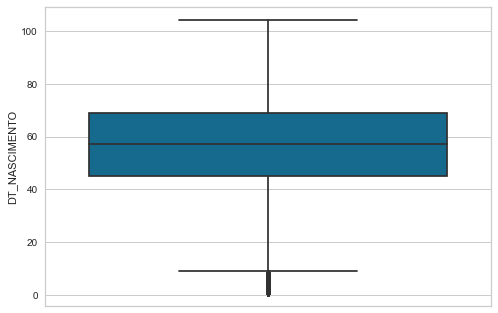

In [ ]:
sns.boxplot(y=df.DT_NASCIMENTO)

#### Ds_TIPO_PREST_SOLICITANTE

In [ ]:
df.DS_TIPO_PREST_SOLICITANTE.value_counts()

CLINICA                  162842
HOSPITAL                 154356
LABORATORIO               42094
CLINICA DE IMAGEM         20616
PRESTADOR DE SERVICOS     14528
MEDICO                     6739
UTI                        6462
CLINICA  DE UROLOGIA       3994
HOME CARE                   799
CLINICA DE RADIOLOGIA       424
INTERCAMBIO                 265
COOPERATIVA                 137
Name: DS_TIPO_PREST_SOLICITANTE, dtype: int64

> Tenho que pensar em uma forma de reduzir a dimensionalidade apenas para essa feature.

#### DS_CBO

In [ ]:
df.DS_CBO.value_counts()

Medico clinico                            110979
Medico oftalmologista                      63597
Medico ortopedista e traumatologista       62223
Medico ginecologista e obstetra            29699
Medico oncologista clinico                 16453
                                           ...  
Medico acupunturista                           4
Psicologo clinico                              3
Cirurgi?o dentista - implantodontista          3
Cirurgi?o dentista - dentistica                1
Medico fisiatra                                1
Name: DS_CBO, Length: 66, dtype: int64

> Devo pensar em como reduzir dimensionalidade desse carinha também.

#### DS_INDICACAO_ACIDENTE

In [ ]:
df.DS_INDICACAO_ACIDENTE.value_counts()

N?o acidente    351743
Outros           60579
Trabalho           745
Transito           189
Name: DS_INDICACAO_ACIDENTE, dtype: int64

> Há pouquíssimos exemplos dessa feature em cada categoria. Vou remover essa feature

In [ ]:
negado = df[df.DS_STATUS_ITEM == "Negado"]

In [ ]:
negado.DS_INDICACAO_ACIDENTE.value_counts()

N?o acidente    104367
Outros           23064
Trabalho           323
Transito            71
Name: DS_INDICACAO_ACIDENTE, dtype: int64

> Ainda manteve a proporção em todas as classes quando filtramos pelas negadas, não serve pra muita coisa.

In [ ]:
df.drop(columns=["DS_INDICACAO_ACIDENTE"], inplace=True)

#### DS_TIPO_INTERNACAO

In [ ]:
df.DS_TIPO_INTERNACAO.value_counts()

Nao internacao    291216
Clinica            58232
Cirurgica          58066
Pediatrica          2579
Obstetrica          1736
Hemodinamica        1378
Psiquiatrica          49
Name: DS_TIPO_INTERNACAO, dtype: int64

> Apenas reduzir a dimensionalidade.

#### DS_REGIME_INTERNACAO

In [ ]:
df.DS_REGIME_INTERNACAO.value_counts()

Nao internacao    291216
Hospitalar        115509
Hospital-dia        5932
Domiciliar           599
Name: DS_REGIME_INTERNACAO, dtype: int64

> Essa feature está altamente correlacionada com a o tipo de internação. Como Tipo de internação há mais categorias, vou optar por remover essa feature aqui.

In [ ]:
df.drop(columns=["DS_REGIME_INTERNACAO"], inplace=True)

#### DS_CARATER_ATENDIMENTO

In [ ]:
df.DS_CARATER_ATENDIMENTO.value_counts()

Eletiva                287442
Urgencia/Emergencia    125814
Name: DS_CARATER_ATENDIMENTO, dtype: int64

> Nada mau, apenas reescrever essa emergencia.

In [ ]:
df.DS_CARATER_ATENDIMENTO = df.DS_CARATER_ATENDIMENTO.map({"Eletiva":"Eletiva",
                                                           "Urgencia/Emergencia":"Emergencia"})

#### DS_TIPO_ACOMODACAO

In [ ]:
df.DS_TIPO_ACOMODACAO.value_counts()

Nao internacao                             291297
Enfermaria                                  82398
UTI Adulto                                  22608
UTI                                         13064
Hospital Dia                                 2085
UTI Neo-Natal                                 777
Home Care                                     644
Apartamento                                   349
TSI - Unidade de Terapia semi-Intensiva        34
Name: DS_TIPO_ACOMODACAO, dtype: int64

> Vou manter essa feature para internações ao invés de tipo de internação, pois também está altamente correlacionada com a mesma.

In [ ]:
df.drop(columns=["DS_TIPO_INTERNACAO"], inplace=True)

#### QT_DIA_SOLICITADO

In [ ]:
df.QT_DIA_SOLICITADO.describe()

count    413256.000000
mean          1.000111
std           2.479208
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          56.000000
Name: QT_DIA_SOLICITADO, dtype: float64

<AxesSubplot:ylabel='QT_DIA_SOLICITADO'>

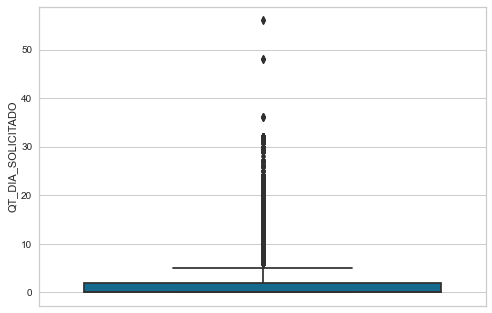

In [ ]:
sns.boxplot(y=df.QT_DIA_SOLICITADO)

> Há outliers aqui, devemos dropá-los.

In [ ]:
IQR = np.percentile(df.QT_DIA_SOLICITADO, 75) - np.percentile(df.QT_DIA_SOLICITADO, 25)
max = np.percentile(df.QT_DIA_SOLICITADO, 75) + 1.5 * IQR
min = np.percentile(df.QT_DIA_SOLICITADO, 25) - 1.5 * IQR

In [ ]:
max

5.0

In [ ]:
df = df[df.QT_DIA_SOLICITADO <= 5]  # removendo outliers

In [ ]:
df.QT_DIA_SOLICITADO.describe()

count    395965.000000
mean          0.606122
std           1.140367
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: QT_DIA_SOLICITADO, dtype: float64

#### DS_TIPO_ATENDIMENTO

In [ ]:
df.DS_TIPO_ATENDIMENTO.value_counts()

Exames                              189271
Nao especificado                     98927
Pequena cirurgia                     45709
Quimioterapia                        19869
Pequenos atendimentos                13113
Pronto socorro                        9327
Terapias                              6532
COVID                                 6495
Internac?o (SADT internado)           2834
Terapia renal substitutiva (TRS)      1438
Consulta                              1219
Atendimento domiciliar                 522
Radioterapia                           396
Remoc?o                                206
Terapia hiperbarica                    107
Name: DS_TIPO_ATENDIMENTO, dtype: int64

> Tenho que reduzir a dimensionalidade.

#### DS_INDICACAO_CLINICA

In [ ]:
df.DS_INDICACAO_CLINICA.value_counts()

Detalhado          108404
Sem descricao       87534
Curto               76559
Medio               55341
Documento anexo     43789
Glaucoma            14138
Cancer de mama      10200
Name: DS_INDICACAO_CLINICA, dtype: int64

> ótimo, já está bonitinho.

In [ ]:
negado = df[df.DS_STATUS_ITEM == "Negado"]

In [ ]:
negado.DS_INDICACAO_CLINICA.value_counts()

Detalhado          35950
Sem descricao      30187
Curto              20108
Documento anexo    16148
Medio              14857
Glaucoma            3961
Cancer de mama      1843
Name: DS_INDICACAO_CLINICA, dtype: int64

> Em conjunto com outras features deve discriminar bem.

#### DS_TIPO_ITEM

In [ ]:
df.DS_TIPO_ITEM.value_counts()

Procedimentos    323032
MAT/MED           72933
Name: DS_TIPO_ITEM, dtype: int64

> Já está no grau.

#### CD_iTEM

In [ ]:
df.CD_ITEM.describe()

count    3.959650e+05
mean     5.941002e+07
std      2.164059e+08
min      4.200000e+01
25%      3.030602e+07
50%      4.081103e+07
75%      4.140141e+07
max      3.000079e+09
Name: CD_ITEM, dtype: float64

> São apenas códigos, vamos dropar essa coluna também.

In [ ]:
df.drop(columns=["CD_ITEM"], inplace=True)

#### DS_ITEM

In [ ]:
df.DS_ITEM.value_counts()

ENFERMARIA                                                                                                     7539
PAQUIMETRIA ULTRASSONICA - MONOCULAR                                                                           7534
PORTE 3 (CIRURGIA MEDIA)                                                                                       7344
MAPEAMENTO DE RETINA (OFTALMOSCOPIA INDIRETA) - MONOCULAR                                                      6861
USG - ULTRASSONOGRAFIA - ABDOME TOTAL (ABDOME SUPERIOR, RINS, BEXIGA, AORTA, VEIA CAVA INFERIOR E ADRENAIS)    6846
                                                                                                               ... 
CANULA MICRODEBRIDACAO EXXOCUT FR2713TP - UN                                                                      1
INSTRUMENTAIS PERMANENTES E DESCARTAVEIS - 3269.EB06 - Endoiluminador tipo Chandelier TotalView 23G               1
SPLINT VPS INTERMEDIARIO RESINA FOTOSSENSIVEL - UN                      

> Isso tem uma cardinalidade muito alta. Embora possa pensar em uma forma de extrair informações daqui, já que é texto livre. Vou dropar a coluna, mas posso pensar em algo a se fazer com isso...

In [ ]:
df.drop(columns=["DS_ITEM"], inplace=True)

#### DS_CLASSE

In [ ]:
df.DS_CLASSE.value_counts()

PROCEDIMENTOS                   43107
ULTRA-SONOGRAFIA DIAGNOSTICA    36339
BIOQUIMICA                      26994
Material de consumo             25101
EM CENTRO CIRURGICO             21124
                                ...  
TELA ADESIVA                        1
OUTROS - IN VIVO                    1
MEIOS DE CONTRASTE                  1
ANTI-HEMORRAGICOS                   1
ALCA DE POLIPECTOMIA                1
Name: DS_CLASSE, Length: 490, dtype: int64

> Terie que reduzir a cardinalidade

#### DS_SUBGRUPO

In [ ]:
df.DS_SUBGRUPO.value_counts()

MEDICINA LABORATORIAL                                                                      61772
Material Hospitalar                                                                        48553
ULTRA-SONOGRAFIA                                                                           36454
EXAMES ESPECIFICOS                                                                         33757
TAXA DE SALA                                                                               29715
                                                                                           ...  
SISTEMA CARDIOVASCULAR+SISTEMA RESPIRATORIO                                                    5
AGENTES IMUNIZANTES                                                                            3
PRODUTOS DERMATOLOGICOS E MEMBRANAS MUCOSAS                                                    3
PRODUTOS DERMATOLOGICOS E MEMBRANAS MUCOSAS+SISTEMA GENITO URINARIO E HORMONIOS SEXUAIS        2
SISTEMA DIGESTIVO, METABOLISMO

> Percebi que DS_SUBGRUPO está altamente redundante com DS_CLASSE... vou manter o SUBGRUPO por ter uma acrdinalidade menor, o que facilitará na hora de diminuir a cardinalidade.

In [ ]:
df.drop(columns=["DS_CLASSE"], inplace=True)

#### DS_GRUPO

In [ ]:
df.DS_GRUPO.value_counts()

PROCED. DIAGNOSTICOS E TERAPEUTICOS    195300
Simpro                                  49321
TAXAS                                   41390
PROCED. CIRURGICOS E INVASIVOS          38997
Brasindice                              21425
PROCED. CLINICOS                        21093
PROCED. GERAIS                          13871
DIARIAS                                 12381
TUSS                                     2187
Name: DS_GRUPO, dtype: int64

> Não está tão discriminativo quanto o subgrupo. Vou manter, mas posso jogar fora a qualquer momento.

#### QT_SOLICITADA

In [ ]:
df.QT_SOLICITADA.describe()

count    395965.000000
mean         60.427139
std        4203.364381
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max      600343.000000
Name: QT_SOLICITADA, dtype: float64

> Tem outliers, vamos remover

In [ ]:
IQR = np.percentile(df.QT_SOLICITADA, 75) - np.percentile(df.QT_SOLICITADA, 25)
max = np.percentile(df.QT_SOLICITADA, 75) + 1.5 * IQR

In [ ]:
max

3.5

In [ ]:
df[df.QT_SOLICITADA > 3.5].DS_STATUS_ITEM.value_counts()

Autorizado    22822
Negado        11392
Name: DS_STATUS_ITEM, dtype: int64

In [ ]:
df[df.QT_SOLICITADA > 3.5].QT_SOLICITADA.describe()

count     34214.000000
mean        685.829134
std       14284.800717
min           4.000000
25%           5.000000
50%          10.000000
75%          21.000000
max      600343.000000
Name: QT_SOLICITADA, dtype: float64

In [ ]:
df[df.QT_SOLICITADA <= 3.5].DS_STATUS_ITEM.value_counts()

Autorizado    250089
Negado        111662
Name: DS_STATUS_ITEM, dtype: int64

In [ ]:
df[df.QT_SOLICITADA > 25].DS_STATUS_ITEM.value_counts()

Autorizado    6244
Negado        2062
Name: DS_STATUS_ITEM, dtype: int64

> 25 é um bom ponto de corte pois o ganho de informação é maior.

In [ ]:
df = df[df.QT_SOLICITADA <= 25]

#### DS_STATUS_ITEM

In [ ]:
df.DS_STATUS_ITEM.value_counts()

Autorizado    266667
Negado        120992
Name: DS_STATUS_ITEM, dtype: int64

### Mais um profiling

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_notebook_iframe()

##### Reduzindo a cardinalidade

In [ ]:
df_ = df.copy()

Para o DS_CBO:

In [ ]:
## para o ds_cbo
df_.DS_CBO.value_counts()

Medico clinico                            100689
Medico oftalmologista                      63596
Medico ortopedista e traumatologista       60554
Medico ginecologista e obstetra            29365
Medico urologista                          13840
                                           ...  
Medico acupunturista                           4
Psicologo clinico                              3
Cirurgi?o dentista - implantodontista          3
Cirurgi?o dentista - dentistica                1
Medico fisiatra                                1
Name: DS_CBO, Length: 66, dtype: int64

> Vamos até o urologista, ou seja, pegar as 5 classes mais frequentes e criar uma "Outros" para o restante.

In [ ]:
def ds_cbo(df_):
    classes= ["Medico clinico", "Medico oftalmologista", "Medico ortopedista e traumatologista ",
              "Medico ginecologista e obstetra ", "Medico urologista "]
    aux = []

    for i in df_.DS_CBO:
        if i in classes:
            aux.append(i)
        else:
            aux.append("Outros")
    
    df_.DS_CBO = aux

In [ ]:
ds_cbo(df_)

In [ ]:
df_.DS_CBO.value_counts()

Outros                                   119615
Medico clinico                           100689
Medico oftalmologista                     63596
Medico ortopedista e traumatologista      60554
Medico ginecologista e obstetra           29365
Medico urologista                         13840
Name: DS_CBO, dtype: int64

Para o DS_SUBGRUPO:

In [ ]:
df_.DS_SUBGRUPO.value_counts()

MEDICINA LABORATORIAL                                                                      61614
Material Hospitalar                                                                        47940
ULTRA-SONOGRAFIA                                                                           36453
EXAMES ESPECIFICOS                                                                         33757
TAXA DE SALA                                                                               29713
                                                                                           ...  
SISTEMA CARDIOVASCULAR                                                                         5
SISTEMA CARDIOVASCULAR+SISTEMA RESPIRATORIO                                                    5
AGENTES IMUNIZANTES                                                                            3
PRODUTOS DERMATOLOGICOS E MEMBRANAS MUCOSAS                                                    3
PRODUTOS DERMATOLOGICOS E MEMB

> Também vamos pegar os 5 valores mais frequentes.

In [ ]:
def ds_subgrupo(df_):
    classes= ["MEDICINA LABORATORIAL ", "Material Hospitalar", "ULTRA-SONOGRAFIA",
            "EXAMES ESPECIFICOS", "TAXA DE SALA"]
    aux = []

    for i in df_.DS_SUBGRUPO:
        if i in classes:
            aux.append(i)
        else:
            aux.append("Outros")
    
    df_.DS_SUBGRUPO = aux

In [ ]:
ds_subgrupo(df_)

In [ ]:
df_.DS_SUBGRUPO.value_counts()

Outros                    178182
MEDICINA LABORATORIAL      61614
Material Hospitalar        47940
ULTRA-SONOGRAFIA           36453
EXAMES ESPECIFICOS         33757
TAXA DE SALA               29713
Name: DS_SUBGRUPO, dtype: int64

Para o DS_TIPO_PREST_SOLICITANTE:

In [ ]:
df_.DS_TIPO_PREST_SOLICITANTE.value_counts()

CLINICA                  157065
HOSPITAL                 137222
LABORATORIO               42036
CLINICA DE IMAGEM         20616
PRESTADOR DE SERVICOS     14517
MEDICO                     6732
UTI                        4534
CLINICA  DE UROLOGIA       3966
CLINICA DE RADIOLOGIA       391
HOME CARE                   225
INTERCAMBIO                 218
COOPERATIVA                 137
Name: DS_TIPO_PREST_SOLICITANTE, dtype: int64

In [ ]:
def tipo_prest_solicitante(df_):
    classes = ["CLINICA", "HOSPITAL", "LABORATORIO", "CLINICA DE IMAGEM",
               "PRESTADOR DE SERVICOS"]
    
    aux = []

    for i in df_.DS_TIPO_PREST_SOLICITANTE:
        if i in classes:
            aux.append(i)
        else:
            aux.append("Outros")

    df_.DS_TIPO_PREST_SOLICITANTE = aux

In [ ]:
tipo_prest_solicitante(df_)

In [ ]:
df_.DS_TIPO_PREST_SOLICITANTE.value_counts()

CLINICA                  157065
HOSPITAL                 137222
LABORATORIO               42036
CLINICA DE IMAGEM         20616
Outros                    16203
PRESTADOR DE SERVICOS     14517
Name: DS_TIPO_PREST_SOLICITANTE, dtype: int64

Para o DS_TIPO_ACOMODACAO:


In [ ]:
df_.DS_TIPO_ACOMODACAO.value_counts()

Nao internacao                             283899
Enfermaria                                  77604
UTI Adulto                                  15129
UTI                                          8265
Hospital Dia                                 2026
Apartamento                                   318
UTI Neo-Natal                                 255
Home Care                                     141
TSI - Unidade de Terapia semi-Intensiva        22
Name: DS_TIPO_ACOMODACAO, dtype: int64

In [ ]:
def tipo_acomodacao(df_):
    classes = ["Nao internacao", "Enfermaria", "UTI Adulto", "UTI", "Hospital Dia"]
    
    aux = []

    for i in df_.DS_TIPO_ACOMODACAO:
        if i in classes:
            aux.append(i)
        else:
            aux.append("Outros")

    df_.DS_TIPO_ACOMODACAO = aux

In [ ]:
tipo_acomodacao(df_)

In [ ]:
df_.DS_TIPO_ACOMODACAO.value_counts()

Nao internacao    283899
Enfermaria         77604
UTI Adulto         15129
UTI                 8265
Hospital Dia        2026
Outros               736
Name: DS_TIPO_ACOMODACAO, dtype: int64

Para o DS_TIPO_ATENDIMENTO:

In [ ]:
df_.DS_TIPO_ATENDIMENTO.value_counts()

Exames                              189107
Nao especificado                     98169
Pequena cirurgia                     45097
Quimioterapia                        14177
Pequenos atendimentos                12579
Pronto socorro                        9318
Terapias                              6520
COVID                                 6237
Internac?o (SADT internado)           2681
Terapia renal substitutiva (TRS)      1435
Consulta                              1219
Atendimento domiciliar                 497
Radioterapia                           359
Remoc?o                                157
Terapia hiperbarica                    107
Name: DS_TIPO_ATENDIMENTO, dtype: int64

In [ ]:
def tipo_atendimento(df_):
    classes = ["Exames", "Nao especificado", "Pequena cirurgia", "Quimioterapia", "Pequenos atendimentos"]
    
    aux = []

    for i in df_.DS_TIPO_ATENDIMENTO:
        if i in classes:
            aux.append(i)
        else:
            aux.append("Outros")

    df_.DS_TIPO_ATENDIMENTO = aux

In [ ]:
tipo_atendimento(df_)

In [ ]:
df_.DS_TIPO_ATENDIMENTO.value_counts()

Exames                   189107
Nao especificado          98169
Pequena cirurgia          45097
Outros                    28530
Quimioterapia             14177
Pequenos atendimentos     12579
Name: DS_TIPO_ATENDIMENTO, dtype: int64

Para o DS_GRUPO:

In [ ]:
df_.DS_GRUPO.value_counts()

PROCED. DIAGNOSTICOS E TERAPEUTICOS    195104
Simpro                                  48657
TAXAS                                   40952
PROCED. CIRURGICOS E INVASIVOS          38994
PROCED. CLINICOS                        20703
Brasindice                              14880
PROCED. GERAIS                          13825
DIARIAS                                 12376
TUSS                                     2168
Name: DS_GRUPO, dtype: int64

In [ ]:
def grupo(df_):
    classes = ["PROCED. DIAGNOSTICOS E TERAPEUTICOS",
               "Simpro", "TAXAS", "PROCED. CIRURGICOS E INVASIVOS ", "PROCED. CLINICOS"]
    
    aux = []

    for i in df_.DS_GRUPO:
        if i in classes:
            aux.append(i)
        else:
            aux.append("Outros")

    df_.DS_GRUPO = aux

In [ ]:
grupo(df_)

In [ ]:
df_.DS_GRUPO.value_counts()

PROCED. DIAGNOSTICOS E TERAPEUTICOS    195104
Simpro                                  48657
Outros                                  43249
TAXAS                                   40952
PROCED. CIRURGICOS E INVASIVOS          38994
PROCED. CLINICOS                        20703
Name: DS_GRUPO, dtype: int64

##### Tem que criar uma função para ajeitar os dados do teste:

In [ ]:
def ajeita_dados(df):
    df.loc[df.CD_CID == "B342", "DS_TIPO_ATENDIMENTO"] = "COVID"
    df.loc[df.CD_CID == "U071", "DS_TIPO_ATENDIMENTO"] = "COVID"

    new_df = df.drop(columns=['CD_CID',
                              'CD_GUIA_REFERENCIA',
                              'CD_ITEM',
                              'DS_CBO',
                              'DS_CLASSE',
                              'DS_INDICACAO_ACIDENTE',
                              'DS_ITEM',
                              'DS_REGIME_INTERNACAO',
                              'DS_SUBGRUPO',
                              'DS_TIPO_CONSULTA',
                              'DS_TIPO_DOENCA',
                              'DS_TIPO_INTERNACAO',
                              'DS_TIPO_SAIDA',
                              'DS_UNIDADE_TEMPO_DOENCA',
                              'DT_REQUISICAO',
                              'NR_PRODUTO',
                              'NR_SEQ_ITEM',
                              'NR_SEQ_REQUISICAO',
                              'QT_TEMPO_DOENCA'])

    new_df.DT_NASCIMENTO = pd.to_datetime(new_df.DT_NASCIMENTO, unit="D", origin="julian")
    new_df.DT_NASCIMENTO = [2022 - x.year for x in new_df.DT_NASCIMENTO]
    new_df.DT_NASCIMENTO.fillna(new_df.DT_NASCIMENTO.mean(), inplace=True)

    new_df.DS_TIPO_GUIA = new_df.DS_TIPO_GUIA.map({"Guia de solicitac?o SP/SADT":"SADT",
                                           "Guia de solicitac?o internac?o":"Internacao",
                                           "Guia de solicitac?o de prorrogac?o de internac?o":"Prorrogacao"})

    new_df.DS_CARATER_ATENDIMENTO = new_df.DS_CARATER_ATENDIMENTO.map({"Eletiva":"Eletiva", "Urgencia/Emergencia":"Emergencia"})

    new_df.QT_DIA_SOLICITADO.fillna(-1, inplace=True)
    new_df.QT_DIA_SOLICITADO += 1


    aux = []

    for i in df.DS_INDICACAO_CLINICA:
        if isinstance(i, float):
            aux.append("Sem descricao")
        elif " mama" in i.lower():
            aux.append("Cancer de mama")
        elif "anexo" in i.lower():
            aux.append("Documento anexo")
        elif "glaucoma" in i.lower():
            aux.append("Glaucoma")
        elif len(i) < 30:
            aux.append("Curto")
        elif 30 <= len(i) <= 70:
            aux.append("Medio")
        elif len(i) > 70:
            aux.append("Detalhado")

    new_df.DS_INDICACAO_CLINICA = aux

    return new_df

In [ ]:
df_test_copy = ajeita_dados(df_test)

##### Averiguando as mudanças:

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df_)
prof.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### FUNÇÃO PREPARA SUBMISSÃO

In [ ]:
def submeta_papai(nome, predicoes):
    from pandas import DataFrame, Series

    index = Series(range(1, len(predicoes)+1))
    predicoes = DataFrame(predicoes, columns=["DS_STATUS_ITEM"], index=index)
    predicoes.DS_STATUS_ITEM = predicoes.DS_STATUS_ITEM.map({0:"Autorizado", 1:"Negado"})
    predicoes.to_csv(rf"C:\Users\alexv\Desktop\AuditoriaOmniSaude\{nome}.csv", index=True, index_label="ID")

##### Função que ajeita dados de teste:

In [ ]:
def ajeita_dados(df):
    df.loc[df.CD_CID == "B342", "DS_TIPO_ATENDIMENTO"] = "COVID"
    df.loc[df.CD_CID == "U071", "DS_TIPO_ATENDIMENTO"] = "COVID"

    new_df = df.drop(columns=['CD_CID',
                              'CD_GUIA_REFERENCIA',
                              'CD_ITEM',
                              'DS_CLASSE',
                              'DS_INDICACAO_ACIDENTE',
                              'DS_ITEM',
                              'DS_REGIME_INTERNACAO',
                              'DS_TIPO_CONSULTA',
                              'DS_TIPO_DOENCA',
                              'DS_TIPO_INTERNACAO',
                              'DS_TIPO_SAIDA',
                              'DS_UNIDADE_TEMPO_DOENCA',
                              'DT_REQUISICAO',
                              'NR_PRODUTO',
                              'NR_SEQ_ITEM',
                              'NR_SEQ_REQUISICAO',
                              'QT_TEMPO_DOENCA'])
    
    new_df.DS_TIPO_ACOMODACAO.fillna("Nao internacao", inplace=True)

    new_df.DT_NASCIMENTO = pd.to_datetime(new_df.DT_NASCIMENTO, unit="D", origin="julian")
    new_df.DT_NASCIMENTO = [2022 - x.year for x in new_df.DT_NASCIMENTO]
    new_df.DT_NASCIMENTO.fillna(new_df.DT_NASCIMENTO.mean(), inplace=True)

    new_df.DS_TIPO_GUIA = new_df.DS_TIPO_GUIA.map({"Guia de solicitac?o SP/SADT":"SADT",
                                           "Guia de solicitac?o internac?o":"Internacao",
                                           "Guia de solicitac?o de prorrogac?o de internac?o":"Prorrogacao"})

    new_df.DS_CARATER_ATENDIMENTO = new_df.DS_CARATER_ATENDIMENTO.map({"Eletiva":"Eletiva", "Urgencia/Emergencia":"Emergencia"})

    new_df.QT_DIA_SOLICITADO.fillna(-1, inplace=True)
    new_df.QT_DIA_SOLICITADO += 1


    aux = []

    for i in df.DS_INDICACAO_CLINICA:
        if isinstance(i, float):
            aux.append("Sem descricao")
        elif " mama" in i.lower():
            aux.append("Cancer de mama")
        elif "anexo" in i.lower():
            aux.append("Documento anexo")
        elif "glaucoma" in i.lower():
            aux.append("Glaucoma")
        elif len(i) < 30:
            aux.append("Curto")
        elif 30 <= len(i) <= 70:
            aux.append("Medio")
        elif len(i) > 70:
            aux.append("Detalhado")

    new_df.DS_INDICACAO_CLINICA = aux
    new_df.QT_DIA_SOLICITADO = new_df.QT_DIA_SOLICITADO.where(new_df.QT_DIA_SOLICITADO <= 5, 5)
    new_df.DS_TIPO_ATENDIMENTO.fillna("Nao especificado", inplace=True)
    new_df.QT_SOLICITADA = new_df.QT_SOLICITADA.where(new_df.QT_SOLICITADA <= 25, 25)

    ds_cbo(new_df)
    ds_subgrupo(new_df)
    tipo_prest_solicitante(new_df)
    tipo_acomodacao(new_df)
    tipo_atendimento(new_df)
    grupo(new_df)

    return new_df

In [ ]:
def ajeita_dados_2(df):
    df.loc[df.CD_CID == "B342", "DS_TIPO_ATENDIMENTO"] = "COVID"
    df.loc[df.CD_CID == "U071", "DS_TIPO_ATENDIMENTO"] = "COVID"

    new_df = df.drop(columns=['CD_CID',
                              'CD_GUIA_REFERENCIA',
                              'CD_ITEM',
                              'DS_CLASSE',
                              'DS_INDICACAO_ACIDENTE',
                              'DS_ITEM',
                              'DS_REGIME_INTERNACAO',
                              'DS_TIPO_CONSULTA',
                              'DS_TIPO_DOENCA',
                              'DS_TIPO_INTERNACAO',
                              'DS_TIPO_SAIDA',
                              'DS_UNIDADE_TEMPO_DOENCA',
                              'DT_REQUISICAO',
                              'NR_PRODUTO',
                              'NR_SEQ_ITEM',
                              'NR_SEQ_REQUISICAO',
                              'QT_TEMPO_DOENCA'])
    
    new_df.DS_TIPO_ACOMODACAO.fillna("Nao internacao", inplace=True)

    new_df.DT_NASCIMENTO = pd.to_datetime(new_df.DT_NASCIMENTO, unit="D", origin="julian")
    new_df.DT_NASCIMENTO = [2022 - x.year for x in new_df.DT_NASCIMENTO]
    new_df.DT_NASCIMENTO.fillna(new_df.DT_NASCIMENTO.mean(), inplace=True)

    new_df.DS_TIPO_GUIA = new_df.DS_TIPO_GUIA.map({"Guia de solicitac?o SP/SADT":"SADT",
                                           "Guia de solicitac?o internac?o":"Internacao",
                                           "Guia de solicitac?o de prorrogac?o de internac?o":"Prorrogacao"})

    new_df.DS_CARATER_ATENDIMENTO = new_df.DS_CARATER_ATENDIMENTO.map({"Eletiva":"Eletiva", "Urgencia/Emergencia":"Emergencia"})

    new_df.QT_DIA_SOLICITADO.fillna(-1, inplace=True)
    new_df.QT_DIA_SOLICITADO += 1


    aux = []

    for i in df.DS_INDICACAO_CLINICA:
        if isinstance(i, float):
            aux.append("Sem descricao")
        elif " mama" in i.lower():
            aux.append("Cancer de mama")
        elif "anexo" in i.lower():
            aux.append("Documento anexo")
        elif "glaucoma" in i.lower():
            aux.append("Glaucoma")
        elif len(i) < 30:
            aux.append("Curto")
        elif 30 <= len(i) <= 70:
            aux.append("Medio")
        elif len(i) > 70:
            aux.append("Detalhado")

    new_df.DS_INDICACAO_CLINICA = aux
    new_df.QT_DIA_SOLICITADO = new_df.QT_DIA_SOLICITADO.where(new_df.QT_DIA_SOLICITADO <= 5, 5)
    new_df.DS_TIPO_ATENDIMENTO.fillna("Nao especificado", inplace=True)
    new_df.QT_SOLICITADA = new_df.QT_SOLICITADA.where(new_df.QT_SOLICITADA <= 25, 25)

    return new_df

##### Train test split

In [ ]:
def train_val_test(X, y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # treino e teste
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)  # treino e val

    return X_train, X_test, X_val, y_train, y_test, y_val

## Modelando

### Baseline

#### Decision trees

##### Transformando os dados para numéricos de forma bem ingênua.

In [ ]:
df_copy = df

In [ ]:
df_copy.drop(columns=["DS_CBO", "DS_SUBGRUPO"], inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387659 entries, 0 to 413265
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DS_TIPO_GUIA               387659 non-null  object 
 1   DT_NASCIMENTO              387659 non-null  int64  
 2   DS_TIPO_PREST_SOLICITANTE  387659 non-null  object 
 3   DS_CARATER_ATENDIMENTO     387659 non-null  object 
 4   DS_TIPO_ACOMODACAO         387659 non-null  object 
 5   QT_DIA_SOLICITADO          387659 non-null  float64
 6   DS_TIPO_ATENDIMENTO        387659 non-null  object 
 7   DS_INDICACAO_CLINICA       387659 non-null  object 
 8   DS_TIPO_ITEM               387659 non-null  object 
 9   DS_GRUPO                   387659 non-null  object 
 10  QT_SOLICITADA              387659 non-null  float64
 11  DS_STATUS_ITEM             387659 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 38.4+ MB


In [ ]:
y = df_copy.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})

In [ ]:
df_copy.drop(columns=["DS_STATUS_ITEM"], inplace=True)

In [ ]:
X = pd.get_dummies(df_copy)

Separando em treino, teste e validação

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # treino e teste

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # train e val

In [ ]:
print(f"X treino: {len(X_train)},\n"
      f"X teste: {len(X_test)},\n"
      f"X validation: {len(X_val)}\n"
      f"df shape: {df.shape[0]}")

X treino: 218058,
X teste: 96915,
X validation: 72686
df shape: 387659


> Criando o baseline agora:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
clf = DecisionTreeClassifier()
sfs1 = SFS(clf, k_features=10, forward=True, verbose=2, scoring='f1', n_jobs=-1)

In [ ]:
sfs1.fit(X_train, y_train)

In [ ]:
sfs1.k_feature_names_

In [ ]:
sfs1.k_score_

0.35304548859498264

Colocando tudo agora:

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
predicitions = clf.predict(X_val)

In [ ]:
import sklearn.metrics as mtr

In [ ]:
mtr.f1_score(y_val, predicitions)

0.4676926435276141

In [ ]:
mtr.accuracy_score(y_val, predicitions)

0.7316126902016895

Fazendo as predições dos dados de teste:

##### Aplicando função

In [ ]:
concat = pd.DataFrame(np.zeros((df_test.shape[0], 2)), columns=["DS_TIPO_ATENDIMENTO_Nao especificado", "DS_TIPO_ACOMODACAO_Nao internacao"])

In [ ]:
df_test_copy["DS_TIPO_ATENDIMENTO_Nao especificado"] = np.zeros(df_test.shape[0])
df_test_copy["DS_TIPO_ACOMODACAO_Nao internacao"] = np.zeros(df_test.shape[0])

In [ ]:
predicitons = clf.predict(df_test_copy)

C:\Users\alexv\anaconda3\envs\DataScience\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [ ]:
predictons = pd.DataFrame(predicitons, columns=["Predicted"])

In [ ]:
predictons["ID"] = range(1,predictons.shape[0] + 1)

In [ ]:
predictons = predictons[["ID", "Predicted"]]

In [ ]:
predictons.Predicted = predictons.Predicted.map({1:"Negado", 0:"Autorizado"})

##### Gerando getdummies

In [ ]:
y = df_.DS_STATUS_ITEM
df_.drop(columns=["DS_STATUS_ITEM"], inplace=True)

In [ ]:
aux = pd.get_dummies(df_)
aux["DS_STATUS_ITEM"] = y
aux.to_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_train.csv", index=False)
del aux

In [ ]:
df_.shape

(387659, 14)

In [ ]:
test = ajeita_dados(df_test)

In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(test)
prof.to_notebook_iframe()

In [ ]:
pd.get_dummies(test).to_csv(R"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_test.csv", index=False)

##### Gerando o baseline em cima desses dados

In [ ]:
df_train = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_train.csv")

In [ ]:
y = df_train.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_train.drop(columns=["DS_STATUS_ITEM"])

In [ ]:
X.shape

(387659, 53)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)  # treino e teste

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # train e val

In [ ]:
print(f"X treino: {len(X_train)},\n"
      f"X teste: {len(X_test)},\n"
      f"X validation: {len(X_val)}\n"
      f"df shape: {X.shape[0]}")

X treino: 218058,
X teste: 96915,
X validation: 72686
df shape: 387659


Verificando o balanceamento das classes:

In [ ]:
y.value_counts()

0    266667
1    120992
Name: DS_STATUS_ITEM, dtype: int64

> Está desbalanceado, mas vamos gerar o baseline em cima disso.

In [ ]:
import sklearn.metrics as mtr

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [ ]:
predictions = clf.predict(X_val)

In [ ]:
mtr.f1_score(y_val, predicitions)

0.4676926435276141

> Não mudou muito além dos outros resultados já obtidos.

### Balanceando

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_train.csv")

In [ ]:
y = df_train.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_train.drop(columns=["DS_STATUS_ITEM"])

In [ ]:
X.shape

(387659, 53)

In [ ]:
y.value_counts()

0    266667
1    120992
Name: DS_STATUS_ITEM, dtype: int64

##### Under Sampling

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
RUS = RandomUnderSampler(sampling_strategy="majority")

In [ ]:
X_under, y_under = RUS.fit_resample(X, y)

In [ ]:
y_under.value_counts()

0    120992
1    120992
Name: DS_STATUS_ITEM, dtype: int64

##### Aplicando os algoritmos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as mtrcs

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
## averiguando o desempenho
predicitions = clf.predict(X_val)

In [ ]:
mtrcs.f1_score(y_val, predicitions)

0.6719019599168252

In [ ]:
## gerando predições para a segunda submissao:
df_test = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_test.csv")

In [ ]:
test = clf.predict(df_test)

#### Submissão 2

In [ ]:
## gerando predições para a segunda submissao:
df_test = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_test.csv")
test = clf.predict(df_test)

In [ ]:
submeta_papai("submissao2", test)

### Perdendo a ingenuidade

#### Ainda utilizando o one hot encoder, mas agora vamos aplicar o cross validation.

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [ ]:
scores = cross_validate(clf, X_train, y_train, cv=5, scoring="f1", n_jobs=-1, verbose=2, return_train_score=True)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   20.4s finished


In [ ]:
scores

{'fit_time': array([15.07903266, 15.16881704, 15.11051083, 15.42804623, 15.41125679]),
 'score_time': array([0.79399514, 0.80461097, 0.8204875 , 0.80469227, 0.80848384]),
 'test_score': array([0.66588149, 0.66487383, 0.66651995, 0.66784739, 0.66543506]),
 'train_score': array([0.83780318, 0.83898628, 0.83938015, 0.83797203, 0.83814541])}

> Nosso modelo overfittou! E isso não é ruim, vamos buscar otimizar os parâmetros.

Vamos buscar os melhores parâmetros:

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {"n_estimators":[2, 5, 10, 100], "criterion":["gini", "entropy"], "max_depth":[1, 2, 5, 10, 50], "min_samples_split":[2, 5, 10, 20], "n_jobs":[-1]}

In [ ]:
grid = GridSearchCV(clf, params, scoring="f1", n_jobs=-1, verbose=2, return_train_score=True, cv=5)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 5, 10, 50],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [2, 5, 10, 100], 'n_jobs': [-1]},
             return_train_score=True, scoring='f1', verbose=2)

In [ ]:
grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=20,
                       n_jobs=-1)

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 50,
 'min_samples_split': 20,
 'n_estimators': 100,
 'n_jobs': -1}

In [ ]:
grid.best_score_

0.6707205653667119

In [ ]:
grid.cv_results_

> Ainda está overfitado. Pode ser por conta da alta cardinalidade. Vamos buscar outros modelos.

> Mas antes, vamos recortar a lista de parâmetros para orbitar em torno dos melhores obtidos até agora:

In [ ]:
params = {"n_estimators":[100, 200], "criterion":["entropy"], "max_depth":[40, 50, 55, 60], "min_samples_split":[20, 50, 100, 500], "n_jobs":[-1]}

In [ ]:
grid = GridSearchCV(clf, params, scoring="f1", n_jobs=-1, verbose=2, return_train_score=True, cv=10)

In [ ]:
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 60,
 'min_samples_split': 20,
 'n_estimators': 100,
 'n_jobs': -1}

In [ ]:
grid.best_score_

0.6765704440878066

In [ ]:
grid.cv_results_

#### Vamos testar o Random Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

ros = RandomOverSampler()

In [ ]:
df_train = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_train.csv")

In [ ]:
y = df_train.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_train.drop(columns=["DS_STATUS_ITEM"])

In [ ]:
## balanceando
X, y = ros.fit_resample(X,y)

In [ ]:
y.value_counts()

1    266667
0    266667
Name: DS_STATUS_ITEM, dtype: int64

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

In [ ]:
y_train.value_counts()

1    150177
0    149823
Name: DS_STATUS_ITEM, dtype: int64

##### Aplicando o random forest

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, min_samples_split=40, n_jobs=1)

cval = cross_validate(clf, X_train, y_train, scoring="f1", cv=10, return_train_score=True, n_jobs=-1)

In [ ]:
cval

> Percebi que, aumentando o valor de max_deth o modelo tende a overfittar, e aumentando o valor de min_samples_split o overfit tende a diminuir.

> Agora tem que achar um valor bom entre o test score e o train_score

> O melhor Random Forest até agora é esse:

RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, min_samples_split=40, n_jobs=-1)


#### Submissão 3:

In [ ]:
## Usando o dataset inteiro para treinar:
y = df_train.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_train.drop(columns=["DS_STATUS_ITEM"])

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, min_samples_split=40, n_jobs=-1)

clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
## gerando predições para a terceira submissao:
df_test = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_test.csv")
test = clf.predict(df_test)

In [ ]:
submeta_papai("submissao3", test)

#### Feature selection

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, min_samples_split=40, n_jobs=-1)

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
## 1 feature
sfs = SFS(clf, forward=True, cv=10, n_jobs=-1, k_features=1, verbose=2)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done  49 out of  53 | elapsed:  2.7min remaining:   13.3s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:  2.7min finished

[2022-04-21 12:19:02] Features: 1/1 -- score: 0.5670457123224022

SequentialFeatureSelector(clone_estimator=True, cv=10,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='entropy',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=

In [ ]:
sfs.k_feature_names_, sfs.k_score_

(('DS_TIPO_PREST_SOLICITANTE_HOSPITAL',), 0.5670457123224022)

> Então apenas 1 feature já resulta em 0.56

In [ ]:
## vamos achar agora as 5 features mais importantes
sfs = SFS(clf, forward=True, cv=10, n_jobs=-1, k_features=5, verbose=2, fixed_features=sfs.k_feature_names_)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  48 out of  52 | elapsed:  3.1min remaining:   15.2s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:  3.1min finished

[2022-04-21 12:39:20] Features: 2/5 -- score: 0.5832157457301965[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  46 out of  51 | elapsed:  3.4min remaining:   21.9s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:  3.6min finished

[2022-04-21 12:42:58] Features: 3/5 -- score: 0.5872123273787236[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  45 out of  50 | elapsed:  4.4min remaining:   29.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finish

SequentialFeatureSelector(clone_estimator=True, cv=10,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='entropy',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=

In [ ]:
sfs.k_feature_names_, sfs.k_score_

(('DT_NASCIMENTO',
  'QT_DIA_SOLICITADO',
  'QT_SOLICITADA',
  'DS_TIPO_PREST_SOLICITANTE_HOSPITAL',
  'DS_TIPO_ATENDIMENTO_Pequenos atendimentos'),
 0.6028460903290503)

In [ ]:
sfs.subsets_

{1: {'feature_idx': (8,),
  'cv_scores': array([0.56832207, 0.56832207, 0.56325301, 0.57368498, 0.56575081,
         0.56876286, 0.56887811, 0.56167805, 0.55998824, 0.57181691]),
  'avg_score': 0.5670457123224022,
  'feature_names': ('DS_TIPO_PREST_SOLICITANTE_HOSPITAL',)},
 2: {'feature_idx': (8, 30),
  'cv_scores': array([0.58154569, 0.58389656, 0.58154569, 0.59028798, 0.58228034,
         0.58529239, 0.58291088, 0.57828227, 0.57828227, 0.58783337]),
  'avg_score': 0.5832157457301965,
  'feature_names': ('DS_TIPO_PREST_SOLICITANTE_HOSPITAL',
   'DS_TIPO_ATENDIMENTO_Pequenos atendimentos')},
 3: {'feature_idx': (2, 8, 30),
  'cv_scores': array([0.58588011, 0.58896562, 0.58676168, 0.59484279, 0.58654129,
         0.587129  , 0.58621703, 0.58129454, 0.58026596, 0.59422526]),
  'avg_score': 0.5872123273787236,
  'feature_names': ('QT_SOLICITADA',
   'DS_TIPO_PREST_SOLICITANTE_HOSPITAL',
   'DS_TIPO_ATENDIMENTO_Pequenos atendimentos')},
 4: {'feature_idx': (1, 2, 8, 30),
  'cv_scores': ar

In [ ]:
## 10 features
sfs = SFS(clf, forward=True, cv=5, n_jobs=-1, k_features=10, verbose=2, fixed_features=sfs.k_feature_names_)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  42 out of  48 | elapsed:  3.7min remaining:   31.9s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.8min finished

[2022-04-21 13:15:21] Features: 6/10 -- score: 0.608804251439518[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  40 out of  47 | elapsed:  3.7min remaining:   38.9s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:  3.7min finished

[2022-04-21 13:19:04] Features: 7/10 -- score: 0.6169002794574331[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  39 out of  46 | elapsed:  3.6min remaining:   38.7s
[Parallel(n_jobs=-1)]: Done  46 out of  46 | elapsed:  3.6min finis

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='entropy',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=4

In [ ]:
sfs.k_feature_names_, sfs.k_score_

(('DT_NASCIMENTO',
  'QT_DIA_SOLICITADO',
  'QT_SOLICITADA',
  'DS_TIPO_PREST_SOLICITANTE_HOSPITAL',
  'DS_CBO_Medico clinico',
  'DS_CARATER_ATENDIMENTO_Emergencia',
  'DS_TIPO_ATENDIMENTO_Pequenos atendimentos',
  'DS_INDICACAO_CLINICA_Curto',
  'DS_INDICACAO_CLINICA_Sem descricao',
  'DS_SUBGRUPO_MEDICINA LABORATORIAL '),
 0.6375150411751985)

### Pycaret

#### Invocando o pycaret para nos auxiliar a encontrar modelos

In [ ]:
from pycaret.classification import *

In [ ]:
df_train = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_train.csv")

In [ ]:
s = setup(df_train, target = "DS_STATUS_ITEM", use_gpu=True)

,Description,Value
0,session_id,7214
1,Target,DS_STATUS_ITEM
2,Target Type,Binary
3,Label Encoded,"Autorizado: 0, Negado: 1"
4,Original Data,"(387659, 54)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,50
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7464,0.7331,0.4519,0.6280,0.5256,0.3587,0.3678,1.7200
et,Extra Trees Classifier,0.7425,0.7410,0.4435,0.6199,0.5171,0.3480,0.3571,14.6560
rf,Random Forest Classifier,0.7411,0.7542,0.4685,0.6087,0.5295,0.3551,0.3609,11.0110
knn,K Neighbors Classifier,0.7243,0.7196,0.4438,0.5732,0.5002,0.3141,0.3191,16.0990
lightgbm,Light Gradient Boosting Machine,0.7184,0.7107,0.1982,0.6563,0.3045,0.1872,0.2402,2.4000
gbc,Gradient Boosting Classifier,0.7080,0.6709,0.1347,0.6461,0.2229,0.1296,0.1906,32.6480
lr,Logistic Regression,0.6995,0.6361,0.1448,0.5652,0.2306,0.1188,0.1617,11.3370
ridge,Ridge Classifier,0.6991,0.0000,0.1294,0.5709,0.2110,0.1086,0.1547,0.1990
lda,Linear Discriminant Analysis,0.6987,0.6355,0.1625,0.5528,0.2511,0.1280,0.1657,1.7780
ada,Ada Boost Classifier,0.6985,0.6410,0.1305,0.5657,0.2120,0.1081,0.1530,8.1170


> Essa abordagem está com o one hot encoder, ficou pior do que a que fiz com Random Forest com Undersampling... Deve ser por conta do Smote e da alta dimensionalidade. Vamos passar o dataset sem one hot.

#### Sem one hot encoder:

In [ ]:
df_train = df.copy()

In [ ]:
s = setup(df_train, target = "DS_STATUS_ITEM", use_gpu=True)

,Description,Value
0,session_id,3307
1,Target,DS_STATUS_ITEM
2,Target Type,Binary
3,Label Encoded,"Autorizado: 0, Negado: 1"
4,Original Data,"(387659, 14)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.7529,0.7360,0.4915,0.6338,0.5537,0.3866,0.3926,5.8180
rf,Random Forest Classifier,0.7498,0.7692,0.4998,0.6233,0.5547,0.3837,0.3882,21.3210
et,Extra Trees Classifier,0.7487,0.7494,0.4796,0.6268,0.5434,0.3742,0.3806,28.5780
knn,K Neighbors Classifier,0.7375,0.7414,0.4747,0.6000,0.5300,0.3513,0.3560,34.3940
lightgbm,Light Gradient Boosting Machine,0.7262,0.7211,0.2423,0.6683,0.3557,0.2275,0.2748,2.3440
gbc,Gradient Boosting Classifier,0.7098,0.6764,0.1374,0.6686,0.2279,0.1361,0.2015,79.7300
lr,Logistic Regression,0.7057,0.6546,0.1728,0.5970,0.2680,0.1489,0.1939,43.0670
ridge,Ridge Classifier,0.7053,0.0000,0.1645,0.6004,0.2583,0.1434,0.1904,0.5640
lda,Linear Discriminant Analysis,0.7029,0.6534,0.1899,0.5713,0.2851,0.1533,0.1905,7.6800
ada,Ada Boost Classifier,0.7010,0.6524,0.1584,0.5748,0.2483,0.1312,0.1739,17.2780


> Os resultados não estão bons... Vamos ter que fazer um feature selection.

### SVM

Vamos testar modelos SVM agora. Kernel linear não é uma opção, conforme pudemos notar com o pycaret.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
params_poly = {"C":[0.1, 1, 10, 100], "kernel":['poly'], "degree":[5, 10, 20, 50]}
params_rbf = {"C":[0.1, 1, 10, 100], "kernel":['rbf']}
params_sig = {"C":[0.1, 1, 10, 100], "kernel":['sigmoid']}

In [ ]:
clf = SVC()

In [ ]:
grid = GridSearchCV(clf, params_sig, scoring="f1", n_jobs=-1, cv=5, verbose=3, return_train_score=True)

In [ ]:
grid.fit(X_train, y_train)  # estou usando o oversampling

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


In [ ]:
clf = SVC(C=1, kernel="sigmoid")

clf.fit(X_train, y_train)

> O SVM não está rodando bem com essa dimensionalidade alta. Vamos ter que adiar seu uso para outros encoders.

### Outros encoders:

In [ ]:
!pip install category_encoders

In [ ]:
df_.info()

##### Random Over sampling + target encoder

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()

y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

## dividindo em treino e teste
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)


enc.fit(X_train, y_train)

X_train = enc.transform(X_train, y_train)
X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

##### Under Sampling

In [ ]:
## Balanceando os dados
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler()

y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

## dividindo em treino e teste
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

In [ ]:
y_train.value_counts()

0    68138
1    67978
Name: DS_STATUS_ITEM, dtype: int64

##### Target encoder

In [ ]:
import category_encoders as ce

In [ ]:
enc = ce.TargetEncoder(return_df=True)

In [ ]:
enc.fit(X_train, y_train)  # é de fundamental importância realizar esse step primeiro!!! Ele garante que o teste e val não terão data leakage

TargetEncoder(cols=['DS_TIPO_GUIA', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO',
                    'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO',
                    'DS_TIPO_ATENDIMENTO', 'DS_INDICACAO_CLINICA',
                    'DS_TIPO_ITEM', 'DS_SUBGRUPO', 'DS_GRUPO'],
              drop_invariant=False, handle_missing='value',
              handle_unknown='value', min_samples_leaf=1, return_df=True,
              smoothing=1.0, verbose=0)

In [ ]:
X_train = enc.transform(X_train, y_train)

> Adendo: O data leakage pode acontecer facilmente usando o target encoder, pois sua formulação se baseia na probabilidade a posteriori de uma categoria de determinada coluna ter seu rótulo (variável alvo) positivo.

> Entre outras palavras, se não tomarmos cuidado, os dados de teste e validação terão a dica se serão positivos ou não, afinal, eles terão a probabilidade daquele exemplo pertencer à variável que queremos prever, o que não faz sentido pois não terá nenhuma dica na hora do deploy.

> Portanto, basta realizar a separação em treino, teste e validação ANTES de passar o encoder. Também "fittar" primeiro o conjunto de treino, após isso realizar as transformações. 



In [ ]:
X_val = enc.transform(X_val, y_val)  # transformando o X de validação
X_test = enc.transform(X_test, y_test)  # transformando o X de teste

In [ ]:
X_val.DS_CBO.value_counts()

0.490699    30862
0.485638    25683
0.570819    16434
0.449940    15571
0.525632     7701
0.536835     3749
Name: DS_CBO, dtype: int64

#####Smote

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import SMOTE

ros = SMOTE()

y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=["DS_STATUS_ITEM"])

## dividindo em treino e teste
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

enc = ce.TargetEncoder(return_df=True)
X_train = enc.fit_transform(X_train, y_train)  # transformando o X de treino
X_val = enc.fit_transform(X_val, y_val)  # transformando o X de validação
X_test = enc.fit_transform(X_test, y_test)  # transformando o X de teste

## balanceando
X_train, y_train = ros.fit_resample(X_train, y_train)
X_val, y_val = ros.fit_resample(X_val, y_val)
X_test, y_test = ros.fit_resample(X_test, y_test)

#### Testando na RF com maior desempenho que obtivemos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=40, min_samples_split=20, n_jobs=-1)

In [ ]:
cval = cross_validate(clf, X_train, y_train, scoring="f1", n_jobs=-1, return_train_score=True, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.8s finished


In [ ]:
cval

{'fit_time': array([7.77973032, 9.30418515, 7.80611634, 7.87718368, 7.92406535]),
 'score_time': array([0.37873363, 0.14064956, 0.30544901, 0.37500548, 0.56251669]),
 'test_score': array([1., 1., 1., 1., 1.]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
## testando nos dados de validacao:
clf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4019, verbose=0,
                       warm_start=False)

In [ ]:
import sklearn.metrics as mtrcs

predictions = clf.predict(X_test)
mtrcs.f1_score(y_test, predictions)

0.735818404361856

### Pycaret de novo

#### Invocando o pycaret para nos auxiliar a encontrar modelos

In [ ]:
from pycaret.classification import *

In [ ]:
X_train["DS_STATUS_ITEM"] = y_train

In [ ]:
X_val["DS_STATUS_ITEM"] = y_val

In [ ]:
y_train.value_counts()

1    150177
0    149823
Name: DS_STATUS_ITEM, dtype: int64

In [ ]:
s = setup(X_train, test_data=X_val, target = "DS_STATUS_ITEM", use_gpu=True, preprocess=False, numeric_features=['DS_TIPO_GUIA', 'DT_NASCIMENTO', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'QT_DIA_SOLICITADO', 'DS_TIPO_ATENDIMENTO', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_SUBGRUPO', 'DS_GRUPO', 'QT_SOLICITADA'])

,Description,Value
0,session_id,4019
1,Target,DS_STATUS_ITEM
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(300000, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Transformed Train Set,"(300000, 13)"
9,Transformed Test Set,"(100000, 13)"


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7305,0.8139,0.7441,0.7249,0.7343,0.4610,0.4612,8.8800
dt,Decision Tree Classifier,0.7275,0.7971,0.7169,0.7329,0.7248,0.4550,0.4552,0.8730
et,Extra Trees Classifier,0.7274,0.8114,0.7152,0.7335,0.7242,0.4548,0.4549,9.1410
knn,K Neighbors Classifier,0.6838,0.7529,0.7066,0.6762,0.6911,0.3675,0.3679,7.7850
lightgbm,Light Gradient Boosting Machine,0.6509,0.7092,0.6148,0.6632,0.6381,0.3018,0.3027,1.6970
gbc,Gradient Boosting Classifier,0.6184,0.6702,0.5528,0.6369,0.5918,0.2368,0.2389,17.7720
ada,Ada Boost Classifier,0.6044,0.6376,0.5527,0.6171,0.5830,0.2089,0.2101,5.6760
qda,Quadratic Discriminant Analysis,0.5960,0.6365,0.4760,0.6271,0.5412,0.1922,0.1981,0.1950
lr,Logistic Regression,0.5932,0.6226,0.4844,0.6199,0.5438,0.1866,0.1912,3.0410
ridge,Ridge Classifier,0.5924,0.0000,0.4847,0.6186,0.5435,0.1850,0.1895,0.1430


In [ ]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4019, verbose=0,
                       warm_start=False)


##### Testando o melhor modelo

In [ ]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4019, verbose=0,
                       warm_start=False)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4019, verbose=0,
                       warm_start=False)

In [ ]:
predictions = clf.predict(X_test)
mtrcs.f1_score(y_test, predictions)

0.735818404361856

#### Submissão 4:

In [ ]:
df_test_ajeitado.head()  # já é ajeitado na seção de oversampling

,DS_TIPO_GUIA,DT_NASCIMENTO,DS_TIPO_PREST_SOLICITANTE,DS_CBO,DS_CARATER_ATENDIMENTO,DS_TIPO_ACOMODACAO,QT_DIA_SOLICITADO,DS_TIPO_ATENDIMENTO,DS_INDICACAO_CLINICA,DS_TIPO_ITEM,DS_SUBGRUPO,DS_GRUPO,QT_SOLICITADA
0,0.460883,72.0,0.447668,0.447613,0.473408,0.460972,0.0,0.451168,0.445639,0.479598,0.442823,0.462392,1.0
1,0.615689,12.0,0.587946,0.491749,0.565799,0.630451,3.0,0.596401,0.523912,0.479598,0.491475,0.510640,2.0
2,0.460883,51.0,0.447668,0.571841,0.473408,0.460972,0.0,0.717065,0.523912,0.594264,0.607502,0.609330,1.0
3,0.460883,40.0,0.473078,0.447613,0.473408,0.460972,0.0,0.451168,0.445639,0.479598,0.442823,0.462392,1.0
4,0.460883,68.0,0.472789,0.491749,0.473408,0.460972,0.0,0.451168,0.533762,0.479598,0.520678,0.462392,1.0


###### Apenas ajeitando todos os dados para treinar

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler
import category_encoders as ce

ros = RandomOverSampler()

y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

enc = ce.TargetEncoder(return_df=True)
enc.fit(X, y)

X = enc.transform(X)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

###### treinando o modelo em cima de tooodos os dados do dataset:

In [ ]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4019, verbose=0,
                       warm_start=False)

In [ ]:
predicitions = clf.predict(df_test_ajeitado)

In [ ]:
submeta_papai("submissao5", predicitions)

> Picareta mentiroso, deu 0.61 no kaggle... Vamos fazer cross val na mão.

#### Cross validation

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=50, min_samples_split=10, n_jobs=-1)

In [ ]:
cval = cross_validate(clf, X_train, y_train, scoring="f1", n_jobs=-1, return_train_score=True, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   26.3s finished


In [ ]:
cval

{'fit_time': array([20.63887644, 20.77520943, 20.77537274, 21.5237639 , 20.71873164]),
 'score_time': array([0.42740917, 0.83852577, 0.95545673, 0.54353666, 0.8485198 ]),
 'test_score': array([0.7191135 , 0.71812749, 0.72048137, 0.71651339, 0.72186056]),
 'train_score': array([0.79868031, 0.80021045, 0.79956688, 0.79916034, 0.79957307])}

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
pred = clf.predict(X_test)

mtrcs.f1_score(y_test, pred)

0.7249729924378827

#### Submissão 5:

###### Apenas ajeitando todos os dados para treinar

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler
import category_encoders as ce

ros = RandomOverSampler()

y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

enc = ce.TargetEncoder(return_df=True)
enc.fit(X, y)

X = enc.transform(X)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

###### treinando o modelo em cima de tooodos os dados do dataset:

In [ ]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
predicitions = clf.predict(df_test_ajeitado)

In [ ]:
submeta_papai("submissao5", predicitions)

> 0.64 no kaggle... F

### James stein encoder

#### Random Over sampling + james stein encoder

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler
import category_encoders

ros = RandomOverSampler()

y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

## dividindo em treino e teste
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

enc = category_encoders.james_stein.JamesSteinEncoder()

enc.fit(X_train, y_train)

X_train = enc.transform(X_train, y_train)
X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

#### Modelando

##### Random Forest

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=20, n_jobs=1)

In [ ]:
cval = cross_validate(clf, X_train, y_train, scoring="f1", n_jobs=-1, return_train_score=True, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.1s finished


In [ ]:
cval

{'fit_time': array([20.15172815, 21.19513202, 19.98768115, 20.04297829, 20.18150425]),
 'score_time': array([0.69575357, 1.35907865, 0.45343709, 0.42849541, 0.68097997]),
 'test_score': array([0.71269584, 0.71432614, 0.71383669, 0.71336479, 0.71090758]),
 'train_score': array([0.7765196 , 0.77701605, 0.77552712, 0.77719593, 0.77614086])}

##### Catboost

In [ ]:
!pip install catboost

  Using cached graphviz-0.20-py3-none-any.whl (46 kB)


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
clf = CatBoostClassifier(iterations=10, learning_rate=0.0001, loss_function="CrossEntropy", 
                         task_type="GPU",
                         verbose=True)

In [ ]:
clf.fit(X_train, y_train, eval_set=(X_val, y_val), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6931423	test: 0.6931414	best: 0.6931414 (0)	total: 5.5ms	remaining: 49.5ms
1:	learn: 0.6931339	test: 0.6931351	best: 0.6931351 (1)	total: 10.3ms	remaining: 41.4ms
2:	learn: 0.6931296	test: 0.6931290	best: 0.6931290 (2)	total: 15.2ms	remaining: 35.6ms
3:	learn: 0.6931237	test: 0.6931230	best: 0.6931230 (3)	total: 20.2ms	remaining: 30.3ms
4:	learn: 0.6931170	test: 0.6931169	best: 0.6931169 (4)	total: 25ms	remaining: 25ms
5:	learn: 0.6931115	test: 0.6931110	best: 0.6931110 (5)	total: 29.6ms	remaining: 19.8ms
6:	learn: 0.6931052	test: 0.6931049	best: 0.6931049 (6)	total: 34.4ms	remaining: 14.7ms
7:	learn: 0.6930995	test: 0.6930990	best: 0.6930990 (7)	total: 38.7ms	remaining: 9.68ms
8:	learn: 0.6930934	test: 0.6930932	best: 0.6930932 (8)	total: 43.2ms	remaining: 4.8ms
9:	learn: 0.6930875	test: 0.6930877	best: 0.6930877 (9)	total: 47.8ms	remaining: 0us
bestTest = 0.6930877344
bestIteration = 9


##### Fazer um feature selection para as árvores

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=None, min_samples_split=20, n_jobs=-1)

In [ ]:
## 1 feature
sfs = SFS(clf, forward=True, cv=5, n_jobs=-1, k_features=1, verbose=2)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  13 | elapsed:  1.0min remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:  1.1min remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.2min finished

[2022-04-21 21:08:59] Features: 1/1 -- score: 0.57824

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=20,


In [ ]:
sfs.k_feature_names_, sfs.k_score_

(('DS_TIPO_ATENDIMENTO',), 0.57824)

In [ ]:
## 5 features
sfs = SFS(clf, forward=True, cv=5, n_jobs=-1, k_features=5, verbose=2, fixed_features=sfs.k_feature_names_)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:  1.2min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  1.3min remaining:   26.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min finished

[2022-04-21 21:12:06] Features: 2/5 -- score: 0.5900299999999999[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:  1.6min remaining:  2.7min
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.6min finished

[2022-04-21 21:13:44] Features: 3/5 -- score: 0.60926[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:  2.6min remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.6min finished

[2022-04-21 21:16:21] Features: 4/5 -- score: 0.6370133333333333[Parallel(n_jobs=-1)]: Using backend LokyBackend

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=20,


In [ ]:
sfs.k_feature_names_, sfs.k_score_

(('DT_NASCIMENTO',
  'DS_TIPO_PREST_SOLICITANTE',
  'DS_CBO',
  'DS_TIPO_ATENDIMENTO',
  'DS_INDICACAO_CLINICA'),
 0.6779666666666666)

In [ ]:
sfs.subsets_

{1: {'feature_idx': (7,),
  'cv_scores': array([0.5765    , 0.57768333, 0.58283333, 0.5775    , 0.57668333]),
  'avg_score': 0.57824,
  'feature_names': ('DS_TIPO_ATENDIMENTO',)},
 2: {'feature_idx': (2, 7),
  'cv_scores': array([0.58733333, 0.58986667, 0.5943    , 0.5909    , 0.58775   ]),
  'avg_score': 0.5900299999999999,
  'feature_names': ('DS_TIPO_PREST_SOLICITANTE', 'DS_TIPO_ATENDIMENTO')},
 3: {'feature_idx': (1, 2, 7),
  'cv_scores': array([0.60465   , 0.60998333, 0.61238333, 0.60986667, 0.60941667]),
  'avg_score': 0.60926,
  'feature_names': ('DT_NASCIMENTO',
   'DS_TIPO_PREST_SOLICITANTE',
   'DS_TIPO_ATENDIMENTO')},
 4: {'feature_idx': (1, 2, 7, 8),
  'cv_scores': array([0.63503333, 0.63901667, 0.63681667, 0.63648333, 0.63771667]),
  'avg_score': 0.6370133333333333,
  'feature_names': ('DT_NASCIMENTO',
   'DS_TIPO_PREST_SOLICITANTE',
   'DS_TIPO_ATENDIMENTO',
   'DS_INDICACAO_CLINICA')},
 5: {'feature_idx': (1, 2, 3, 7, 8),
  'cv_scores': array([0.6754    , 0.67893333, 0.6

In [ ]:
## 10 features
sfs = SFS(clf, forward=True, cv=5, n_jobs=-1, k_features=10, verbose=2, fixed_features=sfs.k_feature_names_)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:  1.9min remaining:  5.8min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  2.1min finished

[2022-04-21 21:25:24] Features: 6/10 -- score: 0.6929166666666666[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:  2.1min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  2.1min finished

[2022-04-21 21:27:30] Features: 7/10 -- score: 0.7014666666666667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:  1.6min remaining:  1.6min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.6min finished

[2022-04-21 21:29:08] Features: 8/10 -- score: 0.7052366666666667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=20,


In [ ]:
sfs.subsets_

{5: {'feature_idx': (1, 2, 3, 7, 8),
  'cv_scores': array([0.67508333, 0.67931667, 0.68158333, 0.6779    , 0.6761    ]),
  'avg_score': 0.6779966666666667,
  'feature_names': ('DT_NASCIMENTO',
   'DS_TIPO_PREST_SOLICITANTE',
   'DS_CBO',
   'DS_TIPO_ATENDIMENTO',
   'DS_INDICACAO_CLINICA')},
 6: {'feature_idx': (1, 2, 3, 6, 7, 8),
  'cv_scores': array([0.69145   , 0.69365   , 0.69596667, 0.69161667, 0.6919    ]),
  'avg_score': 0.6929166666666666,
  'feature_names': ('DT_NASCIMENTO',
   'DS_TIPO_PREST_SOLICITANTE',
   'DS_CBO',
   'QT_DIA_SOLICITADO',
   'DS_TIPO_ATENDIMENTO',
   'DS_INDICACAO_CLINICA')},
 7: {'feature_idx': (1, 2, 3, 4, 6, 7, 8),
  'cv_scores': array([0.70126667, 0.70205   , 0.70383333, 0.69918333, 0.701     ]),
  'avg_score': 0.7014666666666667,
  'feature_names': ('DT_NASCIMENTO',
   'DS_TIPO_PREST_SOLICITANTE',
   'DS_CBO',
   'DS_CARATER_ATENDIMENTO',
   'QT_DIA_SOLICITADO',
   'DS_TIPO_ATENDIMENTO',
   'DS_INDICACAO_CLINICA')},
 8: {'feature_idx': (1, 2, 3, 4, 5,

In [ ]:
## usando todas as features
sfs = SFS(clf, forward=True, cv=5, n_jobs=-1, k_features=X_train.shape[1], verbose=2, fixed_features=sfs.k_feature_names_)
sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  13 | elapsed:   42.7s remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  10 out of  13 | elapsed:  1.1min remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:  1.2min finished

[2022-04-21 21:36:37] Features: 1/13 -- score: 0.57824[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:  1.1min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done   9 out of  12 | elapsed:  1.3min remaining:   25.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min finished

[2022-04-21 21:38:03] Features: 2/13 -- score: 0.5900366666666667[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  11 | elapsed:  1.6min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:  1.7min finished

[2022-04-21 21:39:43] Feature

SequentialFeatureSelector(clone_estimator=True, cv=5,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=20,


In [ ]:
sfs.subsets_

{1: {'feature_idx': (7,),
  'cv_scores': array([0.5765    , 0.57768333, 0.58283333, 0.5775    , 0.57668333]),
  'avg_score': 0.57824,
  'feature_names': ('DS_TIPO_ATENDIMENTO',)},
 2: {'feature_idx': (2, 7),
  'cv_scores': array([0.58733333, 0.58986667, 0.5943    , 0.59095   , 0.58773333]),
  'avg_score': 0.5900366666666667,
  'feature_names': ('DS_TIPO_PREST_SOLICITANTE', 'DS_TIPO_ATENDIMENTO')},
 3: {'feature_idx': (1, 2, 7),
  'cv_scores': array([0.60438333, 0.6102    , 0.61273333, 0.61021667, 0.60921667]),
  'avg_score': 0.6093500000000001,
  'feature_names': ('DT_NASCIMENTO',
   'DS_TIPO_PREST_SOLICITANTE',
   'DS_TIPO_ATENDIMENTO')},
 4: {'feature_idx': (1, 2, 7, 8),
  'cv_scores': array([0.63551667, 0.6382    , 0.63725   , 0.63708333, 0.6377    ]),
  'avg_score': 0.63715,
  'feature_names': ('DT_NASCIMENTO',
   'DS_TIPO_PREST_SOLICITANTE',
   'DS_TIPO_ATENDIMENTO',
   'DS_INDICACAO_CLINICA')},
 5: {'feature_idx': (1, 2, 3, 7, 8),
  'cv_scores': array([0.6751    , 0.67901667, 0.6

### Última tentativa: usar o james stein sem diminuir as categorias em 5.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387659 entries, 0 to 413265
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DS_TIPO_GUIA               387659 non-null  object 
 1   DT_NASCIMENTO              387659 non-null  int64  
 2   DS_TIPO_PREST_SOLICITANTE  387659 non-null  object 
 3   DS_CBO                     387659 non-null  object 
 4   DS_CARATER_ATENDIMENTO     387659 non-null  object 
 5   DS_TIPO_ACOMODACAO         387659 non-null  object 
 6   QT_DIA_SOLICITADO          387659 non-null  float64
 7   DS_TIPO_ATENDIMENTO        387659 non-null  object 
 8   DS_INDICACAO_CLINICA       387659 non-null  object 
 9   DS_TIPO_ITEM               387659 non-null  object 
 10  DS_SUBGRUPO                387659 non-null  object 
 11  DS_GRUPO                   387659 non-null  object 
 12  QT_SOLICITADA              387659 non-null  float64
 13  DS_STATUS_ITEM             38

In [ ]:
## Vou standardizar as features numericas
df.describe()

,DT_NASCIMENTO,QT_DIA_SOLICITADO,QT_SOLICITADA
count,387659.000000,387659.000000,387659.000000
mean,54.819197,0.614470,1.726837
std,18.765835,1.146533,2.085068
min,1.000000,0.000000,1.000000
25%,44.000000,0.000000,1.000000
50%,57.000000,0.000000,1.000000
75%,68.000000,1.000000,2.000000
max,104.000000,5.000000,25.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]] = scaler.fit_transform(df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import category_encoders

ros = RandomOverSampler()

#scaler = MinMaxScaler()
#df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]] = scaler.fit_transform(df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])

y = df.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

## dividindo em treino e teste
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

enc = category_encoders.james_stein.JamesSteinEncoder()

enc.fit(X_train, y_train)

X_train = enc.transform(X_train, y_train)
X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados_2(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import sklearn.metrics as mtrcs

In [ ]:
clf = RandomForestClassifier(n_estimators=100, criterion="entropy", max_depth=None, min_samples_split=40, n_jobs=-1)

In [ ]:
cval = cross_validate(clf, X_train, y_train, scoring="f1", n_jobs=-1, return_train_score=True, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   25.1s remaining:   37.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   25.1s finished


In [ ]:
cval

{'fit_time': array([18.71839404, 18.38941312, 18.68553925, 18.68615699, 18.55137014]),
 'score_time': array([1.07202792, 0.93941283, 1.14369988, 1.12788606, 1.05143785]),
 'test_score': array([0.71583551, 0.7177746 , 0.71920186, 0.71982014, 0.72012715]),
 'train_score': array([0.76868426, 0.76986225, 0.76950226, 0.76889228, 0.76965988])}

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=40, n_jobs=-1)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
mtrcs.f1_score(y_test, pred)

0.7249599661600749

### Submissão 6


In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler
import category_encoders as ce

ros = RandomOverSampler()

y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

enc = ce.james_stein.JamesSteinEncoder(return_df=True)
enc.fit(X, y)

X = enc.transform(X)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados_2(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

In [ ]:
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
pred = clf.predict(df_test_ajeitado)

In [ ]:
submeta_papai("submissao7", pred)

> 0.65 no kaggle... F

## Outros modelos

Hehehehe eu não estava normalizando ou standardizando as variáveis numéricas.

### Pycaret uma última vez

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387659 entries, 0 to 413265
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DS_TIPO_GUIA               387659 non-null  object 
 1   DT_NASCIMENTO              387659 non-null  int64  
 2   DS_TIPO_PREST_SOLICITANTE  387659 non-null  object 
 3   DS_CBO                     387659 non-null  object 
 4   DS_CARATER_ATENDIMENTO     387659 non-null  object 
 5   DS_TIPO_ACOMODACAO         387659 non-null  object 
 6   QT_DIA_SOLICITADO          387659 non-null  float64
 7   DS_TIPO_ATENDIMENTO        387659 non-null  object 
 8   DS_INDICACAO_CLINICA       387659 non-null  object 
 9   DS_TIPO_ITEM               387659 non-null  object 
 10  DS_SUBGRUPO                387659 non-null  object 
 11  DS_GRUPO                   387659 non-null  object 
 12  QT_SOLICITADA              387659 non-null  float64
 13  DS_STATUS_ITEM             38

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import category_encoders

ros = RandomOverSampler()

scaler = MinMaxScaler()
scaler.fit(df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])
#df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]] = scaler.transform(df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])

y = df.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

## dividindo em treino e teste
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

enc = category_encoders.james_stein.JamesSteinEncoder()

enc.fit(X_train, y_train)

X_train = enc.transform(X_train, y_train)
X_val = enc.transform(X_val, y_val)
X_test = enc.transform(X_test, y_test)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados_2(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

## Deve estar bugado o proximo comando, pois deve ser transform baseado nos dados de treino
df_test_ajeitado[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]] = scaler.fit_transform(df_test_ajeitado[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])

In [ ]:
from pycaret.classification import *

In [ ]:
X_train["DS_STATUS_ITEM"] = y_train

In [ ]:
X_val["DS_STATUS_ITEM"] = y_val

In [ ]:
y_train.value_counts()

1    150177
0    149823
Name: DS_STATUS_ITEM, dtype: int64

In [ ]:
s = setup(X_train, test_data=X_val, target = "DS_STATUS_ITEM", use_gpu=True, preprocess=False, numeric_features=['DS_TIPO_GUIA', 'DT_NASCIMENTO', 'DS_TIPO_PREST_SOLICITANTE', 'DS_CBO', 'DS_CARATER_ATENDIMENTO', 'DS_TIPO_ACOMODACAO', 'QT_DIA_SOLICITADO', 'DS_TIPO_ATENDIMENTO', 'DS_INDICACAO_CLINICA', 'DS_TIPO_ITEM', 'DS_SUBGRUPO', 'DS_GRUPO', 'QT_SOLICITADA'])

,Description,Value
0,session_id,2196
1,Target,DS_STATUS_ITEM
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(300000, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Transformed Train Set,"(300000, 13)"
9,Transformed Test Set,"(100000, 13)"


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7518,0.8355,0.7711,0.7428,0.7567,0.5035,0.5039,10.4690
et,Extra Trees Classifier,0.7475,0.8316,0.7439,0.7497,0.7468,0.4950,0.4950,11.5190
dt,Decision Tree Classifier,0.7456,0.8069,0.7462,0.7458,0.7460,0.4912,0.4912,1.0560
knn,K Neighbors Classifier,0.7015,0.7730,0.7261,0.6925,0.7089,0.4029,0.4034,21.3610
lightgbm,Light Gradient Boosting Machine,0.6617,0.7215,0.6226,0.6761,0.6482,0.3236,0.3246,2.3370
catboost,CatBoost Classifier,0.6603,0.7204,0.6267,0.6724,0.6488,0.3206,0.3214,8.0580
gbc,Gradient Boosting Classifier,0.6288,0.6814,0.5674,0.6475,0.6048,0.2577,0.2597,20.5540
ada,Ada Boost Classifier,0.6121,0.6530,0.5638,0.6248,0.5927,0.2243,0.2254,6.0890
qda,Quadratic Discriminant Analysis,0.6008,0.6388,0.4773,0.6347,0.5448,0.2018,0.2084,0.2050
lda,Linear Discriminant Analysis,0.6006,0.6393,0.5214,0.6203,0.5665,0.2014,0.2040,0.4430


In [ ]:
print(best)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2196, verbose=0,
                       warm_start=False)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2196, verbose=0,
                       warm_start=False)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=2196, verbose=0,
                       warm_start=False)

In [ ]:
pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test, pred)

0.759865622157674

### Submissão 7 ou 8, não lembro


In [ ]:
pred = clf.predict(df_test_ajeitado)

In [ ]:
submeta_papai("submissao7ou8", pred)

### Light GBM

#### Testando com one hot encoder

In [ ]:
df_ = pd.read_csv(r"C:\Users\alexv\Desktop\AuditoriaOmniSaude\getdummies_train.csv")

In [ ]:
y = df_.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df_.drop(columns=['DS_STATUS_ITEM'])

In [ ]:
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import cross_validate

In [ ]:
clf = lgb.sklearn.LGBMClassifier(max_depth=-1, num_leaves=31, learning_rate=1)

In [ ]:
cval = cross_validate(clf, X_train, y_train, scoring="f1", n_jobs=-1, return_train_score=True, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.5s finished


In [ ]:
cval

{'fit_time': array([1.41960478, 1.48860049, 1.46160126, 1.44760036, 1.53960037]),
 'score_time': array([0.17499542, 0.1595552 , 0.16755652, 0.16703439, 0.15255308]),
 'test_score': array([0.44677633, 0.44683426, 0.45583055, 0.44776259, 0.44449689]),
 'train_score': array([0.49875547, 0.5049945 , 0.50461834, 0.50001757, 0.50029945])}

#### Testando com james stein leakado

In [ ]:
## Balanceando os dados
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
import category_encoders

ros = RandomOverSampler()

scaler = MinMaxScaler()
scaler.fit(df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])
df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]] = scaler.transform(df[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])

y = df.DS_STATUS_ITEM.map({"Autorizado":0, "Negado":1})
X = df.drop(columns=["DS_STATUS_ITEM"])

## balanceando
X, y = ros.fit_resample(X,y)

## dividindo em treino e teste
X_train, X_test, X_val, y_train, y_test, y_val = train_val_test(X, y)

enc = category_encoders.james_stein.JamesSteinEncoder()

enc.fit(X_train, y_train)

X_train = enc.fit_transform(X_train, y_train)
X_val = enc.fit_transform(X_val, y_val)
X_test = enc.fit_transform(X_test, y_test)
X = enc.fit_transform(X, y)

## já tranformando o df_test tambem
df_test_ajeitado = ajeita_dados_2(df_test)
df_test_ajeitado = enc.transform(df_test_ajeitado)

## Deve estar bugado o proximo comando, pois deve ser transform baseado nos dados de treino
df_test_ajeitado[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]] = scaler.fit_transform(df_test_ajeitado[["DT_NASCIMENTO", "QT_DIA_SOLICITADO", "QT_SOLICITADA"]])

In [ ]:
clf = lgb.sklearn.LGBMClassifier(max_depth=-1, num_leaves=61, learning_rate=1)

In [ ]:
cval = cross_validate(clf, X_train, y_train, scoring="f1", n_jobs=-1, return_train_score=True, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished


In [ ]:
cval

{'fit_time': array([1.57507586, 1.55507565, 1.5950768 , 1.59907556, 1.59212613]),
 'score_time': array([0.19099879, 0.19999957, 0.19199753, 0.19099998, 0.19800258]),
 'test_score': array([0.69264582, 0.69352459, 0.69220698, 0.69394723, 0.69578181]),
 'train_score': array([0.72900085, 0.72744294, 0.72570823, 0.729509  , 0.73084628])}

### Testando RF com james stein leakado

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, criterion="gini", max_depth=20, min_samples_split=40, n_jobs=1)

In [ ]:
cval = cross_validate(clf, X_train, y_train, scoring="f1", n_jobs=-1, return_train_score=True, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   33.1s finished


In [ ]:
cval

{'fit_time': array([27.19514585, 27.72644067, 27.66643715, 27.54043746, 27.69742894]),
 'score_time': array([0.91699481, 0.95571113, 0.95771551, 0.94471693, 0.91471624]),
 'test_score': array([0.68895268, 0.6900707 , 0.69195106, 0.69189264, 0.69053691]),
 'train_score': array([0.72212534, 0.72096915, 0.72079099, 0.72130877, 0.72089991])}

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
pred= clf.predict(X_test)

f1_score(y_test, pred)

0.6379516321720319